In [1]:
import xarray as xr
import rioxarray as rxr

import netCDF4 as nc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import geopandas as gpd

import seaborn as sns
import calendar

from shapely.geometry import Point
from shapely.geometry import box

from matplotlib.ticker import FuncFormatter

from scipy.stats import linregress

In [2]:
gdf = gpd.read_file("/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/INDIA_SHAPEFILE/India_Shape/india_st.shp")

gdf

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596..."
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906..."
7,DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20..."
8,DELHI,"POLYGON ((76.92160 28.78554, 77.11057 28.83400..."
9,GOA,"POLYGON ((73.70534 15.71924, 73.83531 15.77222..."


In [3]:
LLN = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_LLN/FINAL_LLN_INDIA_IST_ST_1_2019_2023_Hourly_Counts.nc")
LLN = LLN['Hourly_FlashCount']
LLN = LLN.sel(time=slice('2019-01-01T05:30:00.000000000', None))
LLN

<xarray.DataArray 'Hourly_FlashCount' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * x        (x) float64 97.25 97.0 96.75 96.5 96.25 ... 69.25 69.0 68.75 68.5
Attributes:
    units:    Flash counts

In [4]:
CAPE = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_CAPE_2019_2023.nc")

CAPE['time'] = pd.to_datetime(CAPE['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = CAPE['time'] + pd.Timedelta(hours=5, minutes=30)

CAPE = CAPE.assign_coords(time=updated_time)

CAPE = CAPE.sel(time=((CAPE.time.dt.year >= 2019) & (CAPE.time.dt.year <= 2023)))

CAPE = CAPE['CAPE']

CAPE

<xarray.DataArray 'CAPE' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00
Attributes:
    units:         J kg**-1
    long_name:     Convective available potential energy
    grid_mapping:  spatial_ref

In [5]:
KI = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_K_INDEX_2019_2023.nc")

KI['time'] = pd.to_datetime(KI['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = KI['time'] + pd.Timedelta(hours=5, minutes=30)

KI = KI.assign_coords(time=updated_time)

KI = KI.sel(time=((KI.time.dt.year >= 2019) & (KI.time.dt.year <= 2023)))

KI = KI['KI']

KI

<xarray.DataArray 'KI' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00
Attributes:
    units:         K
    long_name:     K index
    grid_mapping:  spatial_ref

In [6]:
TTI = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_TTI_INDEX_2019_2023.nc")

TTI['time'] = pd.to_datetime(TTI['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = TTI['time'] + pd.Timedelta(hours=5, minutes=30)

TTI = TTI.assign_coords(time=updated_time)

TTI = TTI.sel(time=((TTI.time.dt.year >= 2019) & (TTI.time.dt.year <= 2023)))

TTI = TTI['TTI']

TTI

<xarray.DataArray 'TTI' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00
Attributes:
    units:         K
    long_name:     Total totals index
    grid_mapping:  spatial_ref

In [7]:
PPT = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_PPT_gkg_2019_2023.nc")

PPT['time'] = pd.to_datetime(PPT['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = PPT['time'] + pd.Timedelta(hours=5, minutes=30)

PPT = PPT.assign_coords(time=updated_time)

PPT = PPT.sel(time=((PPT.time.dt.year >= 2019) & (PPT.time.dt.year <= 2023)))

PPT = PPT['PPT']

PPT

<xarray.DataArray 'PPT' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [8]:
TCW = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_TCW_gm2_2019_2023.nc")

TCW['time'] = pd.to_datetime(TCW['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = TCW['time'] + pd.Timedelta(hours=5, minutes=30)

TCW = TCW.assign_coords(time=updated_time)

TCW = TCW.sel(time=((TCW.time.dt.year >= 2019) & (TCW.time.dt.year <= 2023)))

TCW = TCW['TCW']

TCW

<xarray.DataArray 'TCW' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [9]:
TCWV = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_TCWV_gm2_2019_2023.nc")

TCWV['time'] = pd.to_datetime(TCWV['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = TCWV['time'] + pd.Timedelta(hours=5, minutes=30)

TCWV = TCWV.assign_coords(time=updated_time)

TCWV = TCWV.sel(time=((TCWV.time.dt.year >= 2019) & (TCWV.time.dt.year <= 2023)))

TCWV = TCWV['TCWV']

TCWV

<xarray.DataArray 'TCWV' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [10]:
TCC = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_TCC_2019_2023.nc")

TCC['time'] = pd.to_datetime(TCC['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = TCC['time'] + pd.Timedelta(hours=5, minutes=30)

TCC = TCC.assign_coords(time=updated_time)

TCC = TCC.sel(time=((TCC.time.dt.year >= 2019) & (TCC.time.dt.year <= 2023)))

TCC = TCC['TCC']

TCC

<xarray.DataArray 'TCC' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00
Attributes:
    units:          (0 - 1)
    long_name:      Total cloud cover
    standard_name:  cloud_area_fraction
    grid_mapping:   spatial_ref

In [11]:
SP_HUM_850 = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_SP_HUM_850_gg_hPa_2019_2023.nc")

SP_HUM_850['time'] = pd.to_datetime(SP_HUM_850['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = SP_HUM_850['time'] + pd.Timedelta(hours=5, minutes=30)

SP_HUM_850 = SP_HUM_850.assign_coords(time=updated_time)

SP_HUM_850 = SP_HUM_850.sel(time=((SP_HUM_850.time.dt.year >= 2019) & (SP_HUM_850.time.dt.year <= 2023)))

SP_HUM_850 = SP_HUM_850['SP_HUM_850']

SP_HUM_850

<xarray.DataArray 'SP_HUM_850' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
    level    int32 ...
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [12]:
MEAN_SP_HUM_850_750 = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_MEAN_SP_HUM_850_750_LMT_gg_hPa_2019_2023.nc")

MEAN_SP_HUM_850_750['time'] = pd.to_datetime(MEAN_SP_HUM_850_750['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = MEAN_SP_HUM_850_750['time'] + pd.Timedelta(hours=5, minutes=30)

MEAN_SP_HUM_850_750 = MEAN_SP_HUM_850_750.assign_coords(time=updated_time)

MEAN_SP_HUM_850_750 = MEAN_SP_HUM_850_750.sel(time=((MEAN_SP_HUM_850_750.time.dt.year >= 2019) & (MEAN_SP_HUM_850_750.time.dt.year <= 2023)))

MEAN_SP_HUM_850_750 = MEAN_SP_HUM_850_750['MEAN_SP_HUM_850_750']

MEAN_SP_HUM_850_750

<xarray.DataArray 'MEAN_SP_HUM_850_750' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [13]:
SUM_SP_HUM_850_750 = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_SUM_SP_HUM_850_750_LMT_gg_hPa_2019_2023.nc")

SUM_SP_HUM_850_750['time'] = pd.to_datetime(SUM_SP_HUM_850_750['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = SUM_SP_HUM_850_750['time'] + pd.Timedelta(hours=5, minutes=30)

SUM_SP_HUM_850_750 = SUM_SP_HUM_850_750.assign_coords(time=updated_time)

SUM_SP_HUM_850_750 = SUM_SP_HUM_850_750.sel(time=((SUM_SP_HUM_850_750.time.dt.year >= 2019) & (SUM_SP_HUM_850_750.time.dt.year <= 2023)))

SUM_SP_HUM_850_750 = SUM_SP_HUM_850_750['SUM_SP_HUM_850_750']

SUM_SP_HUM_850_750

<xarray.DataArray 'SUM_SP_HUM_850_750' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [14]:
MEAN_SP_HUM_700_500 = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_MEAN_SP_HUM_700_500_UMT_gg_hPa_2019_2023.nc")

MEAN_SP_HUM_700_500['time'] = pd.to_datetime(MEAN_SP_HUM_700_500['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = MEAN_SP_HUM_700_500['time'] + pd.Timedelta(hours=5, minutes=30)

MEAN_SP_HUM_700_500 = MEAN_SP_HUM_700_500.assign_coords(time=updated_time)

MEAN_SP_HUM_700_500 = MEAN_SP_HUM_700_500.sel(time=((MEAN_SP_HUM_700_500.time.dt.year >= 2019) & (MEAN_SP_HUM_700_500.time.dt.year <= 2023)))

MEAN_SP_HUM_700_500 = MEAN_SP_HUM_700_500['MEAN_SP_HUM_700_500']

MEAN_SP_HUM_700_500

<xarray.DataArray 'MEAN_SP_HUM_700_500' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [15]:
SUM_SP_HUM_700_500 = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_SUM_SP_HUM_700_500_UMT_gg_hPa_2019_2023.nc")

SUM_SP_HUM_700_500['time'] = pd.to_datetime(SUM_SP_HUM_700_500['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = SUM_SP_HUM_700_500['time'] + pd.Timedelta(hours=5, minutes=30)

SUM_SP_HUM_700_500 = SUM_SP_HUM_700_500.assign_coords(time=updated_time)

SUM_SP_HUM_700_500 = SUM_SP_HUM_700_500.sel(time=((SUM_SP_HUM_700_500.time.dt.year >= 2019) & (SUM_SP_HUM_700_500.time.dt.year <= 2023)))

SUM_SP_HUM_700_500 = SUM_SP_HUM_700_500['SUM_SP_HUM_700_500']

SUM_SP_HUM_700_500

<xarray.DataArray 'SUM_SP_HUM_700_500' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [16]:
REL_HUM_850 = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_CLIPPED_REL_HUM_850_hPa.nc")

REL_HUM_850['time'] = pd.to_datetime(REL_HUM_850['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = REL_HUM_850['time'] + pd.Timedelta(hours=5, minutes=30)

REL_HUM_850 = REL_HUM_850.assign_coords(time=updated_time)

REL_HUM_850 = REL_HUM_850.sel(time=((REL_HUM_850.time.dt.year >= 2019) & (REL_HUM_850.time.dt.year <= 2023)))

REL_HUM_850 = REL_HUM_850['REL_HUM_850']

REL_HUM_850

<xarray.DataArray 'REL_HUM_850' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
    level    int32 ...
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity
    grid_mapping:   spatial_ref

In [17]:
CAPE_PPT_INDEX = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_INDEX_CLIPPED_CAPE_PPT_INDEX_2019_2023.nc")

CAPE_PPT_INDEX['time'] = pd.to_datetime(CAPE_PPT_INDEX['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = CAPE_PPT_INDEX['time'] + pd.Timedelta(hours=5, minutes=30)

CAPE_PPT_INDEX = CAPE_PPT_INDEX.assign_coords(time=updated_time)

CAPE_PPT_INDEX = CAPE_PPT_INDEX.sel(time=((CAPE_PPT_INDEX.time.dt.year >= 2019) & (CAPE_PPT_INDEX.time.dt.year <= 2023)))

CAPE_PPT_INDEX = CAPE_PPT_INDEX['CAPE_PPT_INDEX']

CAPE_PPT_INDEX


<xarray.DataArray 'CAPE_PPT_INDEX' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [18]:
CAPE_SP_HUM_850_INDEX = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_INDEX_CLIPPED_CAPE_SP_HUM_850_INDEX_2019_2023.nc")

CAPE_SP_HUM_850_INDEX['time'] = pd.to_datetime(CAPE_SP_HUM_850_INDEX['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = CAPE_SP_HUM_850_INDEX['time'] + pd.Timedelta(hours=5, minutes=30)

CAPE_SP_HUM_850_INDEX = CAPE_SP_HUM_850_INDEX.assign_coords(time=updated_time)

CAPE_SP_HUM_850_INDEX = CAPE_SP_HUM_850_INDEX.sel(time=((CAPE_SP_HUM_850_INDEX.time.dt.year >= 2019) & (CAPE_SP_HUM_850_INDEX.time.dt.year <= 2023)))

CAPE_SP_HUM_850_INDEX = CAPE_SP_HUM_850_INDEX['CAPE_SP_HUM_850_INDEX']

CAPE_SP_HUM_850_INDEX

<xarray.DataArray 'CAPE_SP_HUM_850_INDEX' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
    level    int32 ...
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [19]:
CAPE_MEAN_SP_HUM_850_750_INDEX = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_INDEX_CLIPPED_CAPE_MEAN_SP_HUM_850_750_INDEX_2019_2023.nc")

CAPE_MEAN_SP_HUM_850_750_INDEX['time'] = pd.to_datetime(CAPE_MEAN_SP_HUM_850_750_INDEX['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = CAPE_MEAN_SP_HUM_850_750_INDEX['time'] + pd.Timedelta(hours=5, minutes=30)

CAPE_MEAN_SP_HUM_850_750_INDEX = CAPE_MEAN_SP_HUM_850_750_INDEX.assign_coords(time=updated_time)

CAPE_MEAN_SP_HUM_850_750_INDEX = CAPE_MEAN_SP_HUM_850_750_INDEX.sel(time=((CAPE_MEAN_SP_HUM_850_750_INDEX.time.dt.year >= 2019) & (CAPE_MEAN_SP_HUM_850_750_INDEX.time.dt.year <= 2023)))

CAPE_MEAN_SP_HUM_850_750_INDEX = CAPE_MEAN_SP_HUM_850_750_INDEX['CAPE_MEAN_SP_HUM_850_750_INDEX']

CAPE_MEAN_SP_HUM_850_750_INDEX

<xarray.DataArray 'CAPE_MEAN_SP_HUM_850_750_INDEX' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [20]:
CAPE_SUM_SP_HUM_850_750_INDEX = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_INDEX_CLIPPED_CAPE_SUM_SP_HUM_850_750_INDEX_2019_2023.nc")

CAPE_SUM_SP_HUM_850_750_INDEX['time'] = pd.to_datetime(CAPE_SUM_SP_HUM_850_750_INDEX['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = CAPE_SUM_SP_HUM_850_750_INDEX['time'] + pd.Timedelta(hours=5, minutes=30)

CAPE_SUM_SP_HUM_850_750_INDEX = CAPE_SUM_SP_HUM_850_750_INDEX.assign_coords(time=updated_time)

CAPE_SUM_SP_HUM_850_750_INDEX = CAPE_SUM_SP_HUM_850_750_INDEX.sel(time=((CAPE_SUM_SP_HUM_850_750_INDEX.time.dt.year >= 2019) & (CAPE_SUM_SP_HUM_850_750_INDEX.time.dt.year <= 2023)))

CAPE_SUM_SP_HUM_850_750_INDEX = CAPE_SUM_SP_HUM_850_750_INDEX['CAPE_SUM_SP_HUM_850_750_INDEX']

CAPE_SUM_SP_HUM_850_750_INDEX

<xarray.DataArray 'CAPE_SUM_SP_HUM_850_750_INDEX' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [21]:
CAPE_MEAN_SP_HUM_700_500_INDEX = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_INDEX_CLIPPED_CAPE_MEAN_SP_HUM_700_500_INDEX_2019_2023.nc")

CAPE_MEAN_SP_HUM_700_500_INDEX['time'] = pd.to_datetime(CAPE_MEAN_SP_HUM_700_500_INDEX['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = CAPE_MEAN_SP_HUM_700_500_INDEX['time'] + pd.Timedelta(hours=5, minutes=30)

CAPE_MEAN_SP_HUM_700_500_INDEX = CAPE_MEAN_SP_HUM_700_500_INDEX.assign_coords(time=updated_time)

CAPE_MEAN_SP_HUM_700_500_INDEX = CAPE_MEAN_SP_HUM_700_500_INDEX.sel(time=((CAPE_MEAN_SP_HUM_700_500_INDEX.time.dt.year >= 2019) & (CAPE_MEAN_SP_HUM_700_500_INDEX.time.dt.year <= 2023)))

CAPE_MEAN_SP_HUM_700_500_INDEX = CAPE_MEAN_SP_HUM_700_500_INDEX['CAPE_MEAN_SP_HUM_700_500_INDEX']

CAPE_MEAN_SP_HUM_700_500_INDEX

<xarray.DataArray 'CAPE_MEAN_SP_HUM_700_500_INDEX' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [22]:
CAPE_SUM_SP_HUM_700_500_INDEX = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_INDEX_CLIPPED_CAPE_SUM_SP_HUM_700_500_INDEX_2019_2023.nc")

CAPE_SUM_SP_HUM_700_500_INDEX['time'] = pd.to_datetime(CAPE_SUM_SP_HUM_700_500_INDEX['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = CAPE_SUM_SP_HUM_700_500_INDEX['time'] + pd.Timedelta(hours=5, minutes=30)

CAPE_SUM_SP_HUM_700_500_INDEX = CAPE_SUM_SP_HUM_700_500_INDEX.assign_coords(time=updated_time)

CAPE_SUM_SP_HUM_700_500_INDEX = CAPE_SUM_SP_HUM_700_500_INDEX.sel(time=((CAPE_SUM_SP_HUM_700_500_INDEX.time.dt.year >= 2019) & (CAPE_SUM_SP_HUM_700_500_INDEX.time.dt.year <= 2023)))

CAPE_SUM_SP_HUM_700_500_INDEX = CAPE_SUM_SP_HUM_700_500_INDEX['CAPE_SUM_SP_HUM_700_500_INDEX']

CAPE_SUM_SP_HUM_700_500_INDEX

<xarray.DataArray 'CAPE_SUM_SP_HUM_700_500_INDEX' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [23]:
CAPE_REL_HUM_850_INDEX = xr.open_dataset(r"/media/krish/DATA/RINU/RINU_FILES/DATASETS_FINAL_FOR_THESIS/FINAL_THESIS_ERA5_DATA_UTC/ERA5_INDEX_CLIPPED_CAPE_REL_HUM_850_INDEX_2019_2023.nc")

CAPE_REL_HUM_850_INDEX['time'] = pd.to_datetime(CAPE_REL_HUM_850_INDEX['time'], format='%Y-%m-%dT%H:%M:%S.%f')

updated_time = CAPE_REL_HUM_850_INDEX['time'] + pd.Timedelta(hours=5, minutes=30)

CAPE_REL_HUM_850_INDEX = CAPE_REL_HUM_850_INDEX.assign_coords(time=updated_time)

CAPE_REL_HUM_850_INDEX = CAPE_REL_HUM_850_INDEX.sel(time=((CAPE_REL_HUM_850_INDEX.time.dt.year >= 2019) & (CAPE_REL_HUM_850_INDEX.time.dt.year <= 2023)))

CAPE_REL_HUM_850_INDEX = CAPE_REL_HUM_850_INDEX['CAPE_REL_HUM_850_INDEX']

CAPE_REL_HUM_850_INDEX

<xarray.DataArray 'CAPE_REL_HUM_850_INDEX' (time: 43819, y: 120, x: 116)>
[609960480 values with dtype=float32]
Coordinates:
  * x        (x) float64 68.5 68.75 69.0 69.25 69.5 ... 96.5 96.75 97.0 97.25
  * y        (y) float64 36.75 36.5 36.25 36.0 35.75 ... 8.0 7.75 7.5 7.25 7.0
    level    int32 ...
  * time     (time) datetime64[ns] 2019-01-01T05:30:00 ... 2023-12-31T23:30:00

In [24]:
FINAL_FILES = xr.merge([LLN, CAPE, KI, TTI, PPT, SP_HUM_850, MEAN_SP_HUM_850_750, SUM_SP_HUM_850_750, REL_HUM_850, CAPE_PPT_INDEX, CAPE_SP_HUM_850_INDEX, CAPE_MEAN_SP_HUM_850_750_INDEX, 
                        CAPE_SUM_SP_HUM_850_750_INDEX, CAPE_REL_HUM_850_INDEX])

FINAL_FILES

<xarray.Dataset>
Dimensions:                         (time: 43819, y: 120, x: 116)
Coordinates:
  * time                            (time) datetime64[ns] 2019-01-01T05:30:00...
  * y                               (y) float64 36.75 36.5 36.25 ... 7.25 7.0
  * x                               (x) float64 68.5 68.75 69.0 ... 97.0 97.25
    level                           int32 850
Data variables: (12/14)
    Hourly_FlashCount               (time, y, x) float64 ...
    CAPE                            (time, y, x) float32 ...
    KI                              (time, y, x) float32 ...
    TTI                             (time, y, x) float32 ...
    PPT                             (time, y, x) float32 ...
    SP_HUM_850                      (time, y, x) float32 ...
    ...                              ...
    REL_HUM_850                     (time, y, x) float32 ...
    CAPE_PPT_INDEX                  (time, y, x) float32 ...
    CAPE_SP_HUM_850_INDEX           (time, y, x) float32 ...
    CAPE_MEAN_SP_HUM_850_750_INDEX  (time, y, x) float32 ...
    CAPE_SUM_SP_HUM_850_750_INDEX   (time, y, x) float32 ...
    CAPE_REL_HUM_850_INDEX          (time, y, x) float32 ...
Attributes:
    units:    Flash counts

In [25]:
WINTER_FINAL_FILES = FINAL_FILES.sel(time=((FINAL_FILES.time.dt.month >= 1) & (FINAL_FILES.time.dt.month <= 2)))
PRE_MONSOON_FINAL_FILES = FINAL_FILES.sel(time=((FINAL_FILES.time.dt.month >= 3) & (FINAL_FILES.time.dt.month <= 5)))
MONSOON_FINAL_FILES = FINAL_FILES.sel(time=((FINAL_FILES.time.dt.month >= 6) & (FINAL_FILES.time.dt.month <= 9)))
POST_MONSOON_FINAL_FILES = FINAL_FILES.sel(time=((FINAL_FILES.time.dt.month >= 10) & (FINAL_FILES.time.dt.month <= 12)))

In [33]:
# VARIABLE_FILES = xr.merge([LLN, CAPE, PPT, TCW, TCWV, TCC, SP_HUM_850, MEAN_SP_HUM_850_750,  SUM_SP_HUM_850_750, MEAN_SP_HUM_700_500, SUM_SP_HUM_700_500, REL_HUM_850])

# VARIABLE_FILES

In [32]:
# WINTER_VARIABLE_FILES = VARIABLE_FILES.sel(time=((VARIABLE_FILES.time.dt.month >= 1) & (VARIABLE_FILES.time.dt.month <= 2)))
# PRE_MONSOON_VARIABLE_FILES = VARIABLE_FILES.sel(time=((VARIABLE_FILES.time.dt.month >= 3) & (VARIABLE_FILES.time.dt.month <= 5)))
# MONSOON_VARIABLE_FILES = VARIABLE_FILES.sel(time=((VARIABLE_FILES.time.dt.month >= 6) & (VARIABLE_FILES.time.dt.month <= 9)))
# POST_MONSOON_VARIABLE_FILES = VARIABLE_FILES.sel(time=((VARIABLE_FILES.time.dt.month >= 10) & (VARIABLE_FILES.time.dt.month <= 12)))

In [31]:
# variables_to_compare = ['CAPE', 'PPT', 'TCW', 'TCWV', 'TCC', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'MEAN_SP_HUM_700_500', 'SUM_SP_HUM_700_500','REL_HUM_850']

# correlation_values = {}

# for var in variables_to_compare:
#     correlation = xr.corr(
#         VARIABLE_FILES['Hourly_FlashCount'],  # No need to group by time.hour
#         VARIABLE_FILES[var],
#         dim='time'  # Correlate across time while preserving spatial dimensions (lat, lon)
#     )
#     correlation_values[var] = correlation


In [30]:
# shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
# full_names = ['CAPE', 'PPT', 'TCW', 'TCWV', 'TCC', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'MEAN_SP_HUM_700_500', 'SUM_SP_HUM_700_500','REL_HUM_850']

# correlation_data = []

# for var in variables_to_compare:
#     correlation_flattened = correlation_values[var].values.flatten()
#     correlation_data.append(correlation_flattened)

# plt.figure(figsize=(16, 6))  
# palette = sns.color_palette()  
# sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

# plt.yticks(fontsize=10, fontweight='bold')
# plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
# plt.title('\nBox Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
# plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
# plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# # Adjust the y-axis limits
# # plt.ylim(-0.04, 0.16)

# # Thicken the frame of the plot
# ax = plt.gca()
# ax.spines['top'].set_linewidth(1)
# ax.spines['right'].set_linewidth(1)
# ax.spines['bottom'].set_linewidth(1)
# ax.spines['left'].set_linewidth(1)

# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
# legend.get_frame().set_linewidth(2) 


# plt.tight_layout()
# plt.show()


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/functi

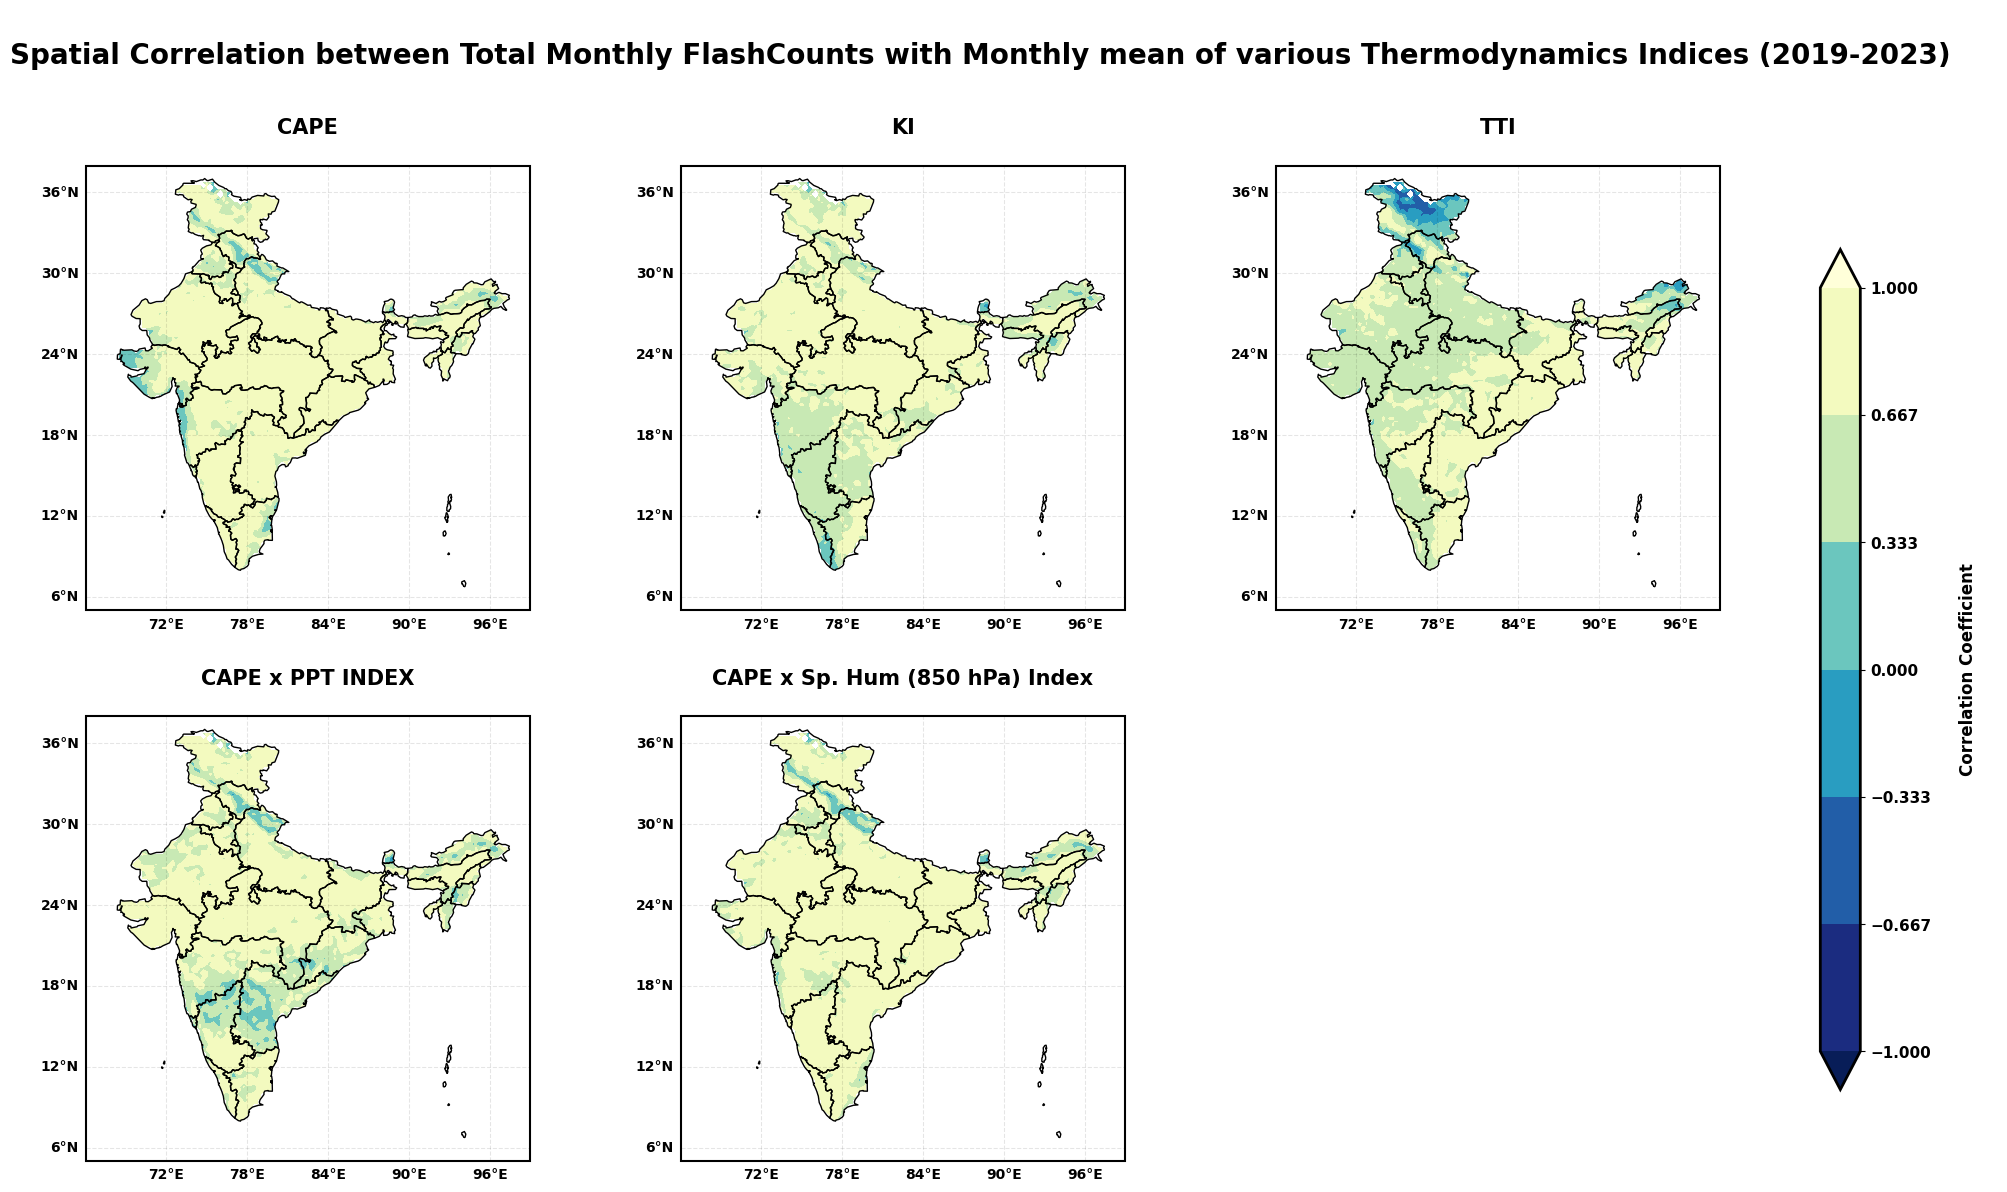

In [26]:
xedges = FINAL_FILES['x']
yedges = FINAL_FILES['y']

indexes_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT INDEX', 'CAPE x Sp. Hum (850 hPa) Index']

variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(right=0.8)

plt.suptitle('\nSpatial Correlation between Total Monthly FlashCounts with Monthly mean of various Thermodynamics Indices (2019-2023)', fontsize=20, fontweight='bold')

correlation_list = []

for idx, var in enumerate(variables_to_compare):
    meteorological_var = FINAL_FILES[var].groupby('time.month').mean(dim=['time'])
    flash_count = FINAL_FILES['Hourly_FlashCount'].groupby('time.month').sum(dim='time')

    correlation = np.zeros((len(yedges), len(xedges)))

    for i in range(len(xedges)):
        for j in range(len(yedges)):
            correlation[j, i] = np.corrcoef(flash_count[:, j, i], meteorological_var[:, j, i], rowvar=False)[0, 1]

    correlation_list.append(correlation)

    # Select the correct axis for plotting
    row_idx = idx // 3  # Determine which row (0 for the first row, 1 for the second row)
    col_idx = idx % 3   # Determine which column (0, 1, or 2)

    ax = axes[row_idx, col_idx]  # Use this index to select the axis

    ax.set_extent([66, 99, 5, 38], crs=ccrs.PlateCarree())
    x, y = np.meshgrid(xedges, yedges)

    levels = np.linspace(-1, 1, 7)
    contours = ax.contourf(x, y, correlation, cmap='YlGnBu_r', extend='both', levels=levels)

    gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--')

    gl.xlocator = plt.MultipleLocator(6)  # Every 2 degrees longitude
    gl.ylocator = plt.MultipleLocator(6)  # Every 2 degrees latitude

    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'weight': 'bold'}
    gl.ylabel_style = {'size': 10, 'weight': 'bold'}

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set the meshgrid outer border thickness

    ax.set_title(f'\n\n{indexes_names[idx]}\n', fontsize=15, fontweight='bold')  
    ax.set_xlabel('\nLongitude\n')
    ax.set_ylabel('\nLatitude\n')

# Add a colorbar to the side
cbar_ax = fig.add_axes([0.92, 0.08, 0.02, 0.7])  # Adjust position [left, bottom, width, height]
cbar = fig.colorbar(contours, cax=cbar_ax, orientation='vertical')
cbar.set_ticks(levels)
cbar.ax.yaxis.set_tick_params(labelsize='11')
cbar.ax.yaxis.labelpad = 20  # Adjust this value to increase the space

cbar.set_label('Correlation Coefficient\n', fontsize=12, fontweight='bold')

cbar.outline.set_linewidth(2)  # Set the colorbar border thickness

for label in cbar.ax.yaxis.get_ticklabels():  
    label.set_fontsize(11)  # Set fontsize  
    label.set_fontweight('bold')  # Set bold  

# Optionally hide any unused subplots
for unused_ax in axes.flat[len(variables_to_compare):]:
    unused_ax.set_visible(False)
    
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar
plt.subplots_adjust(top=0.85)  # Adjust top to make room for the suptitle
plt.show()


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/functi

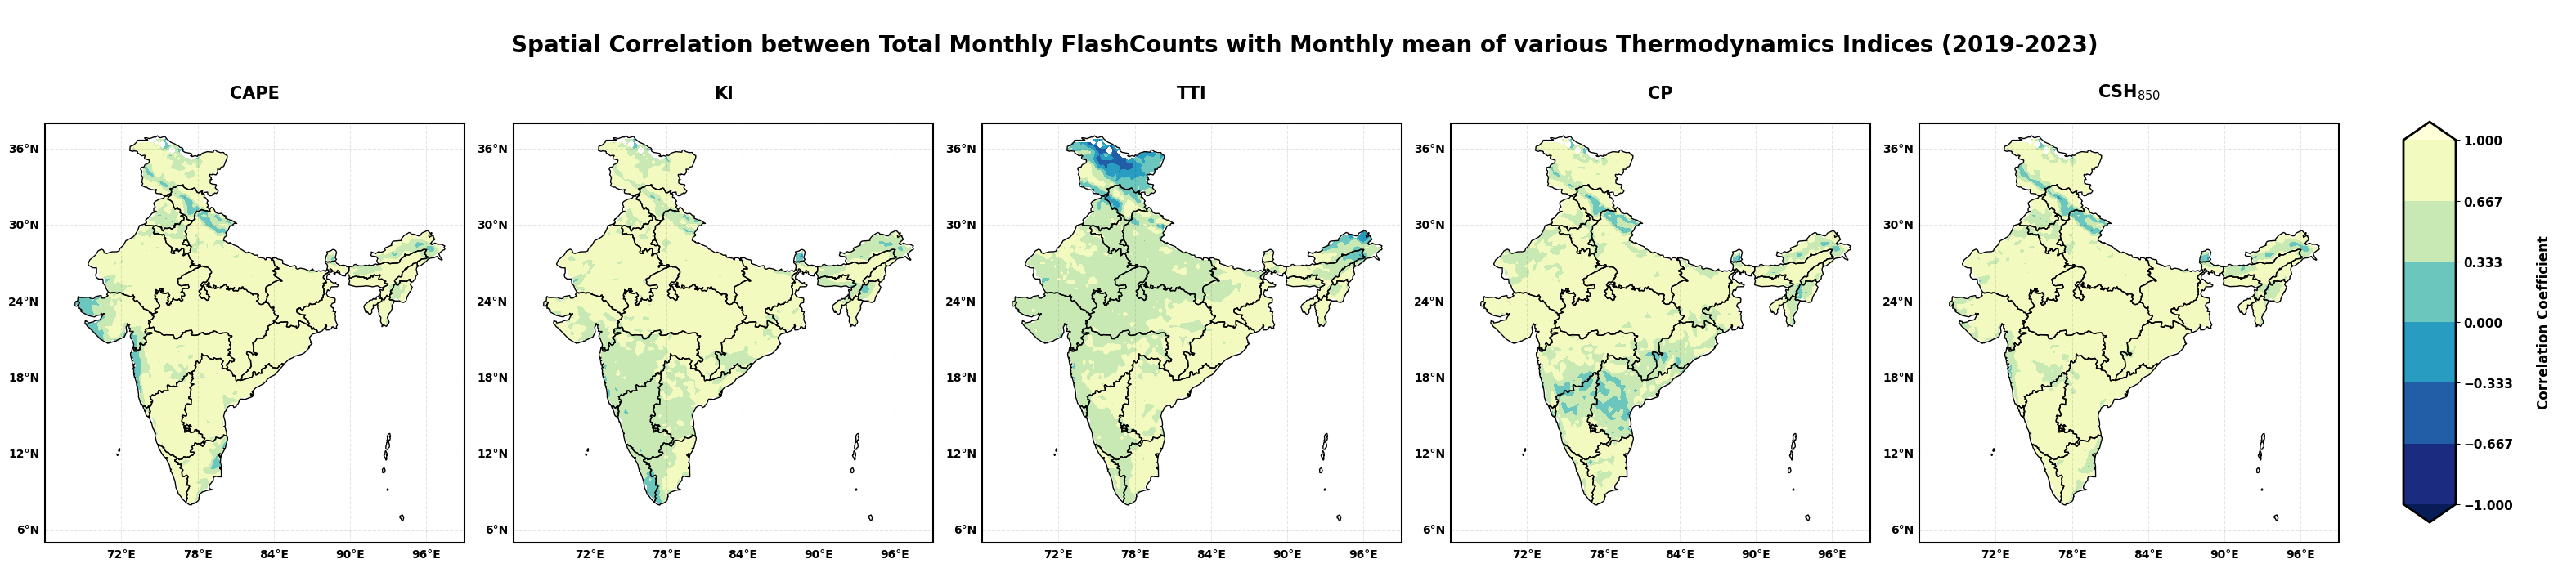

In [102]:

xedges = FINAL_FILES['x']
yedges = FINAL_FILES['y']

indexes_names = ['CAPE', 'KI', 'TTI', 'CP', 'CSH$_{850}$']

variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

# Set up a single row with 5 columns
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_compare), figsize=(32, 7), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(right=0.8)

plt.suptitle('\nSpatial Correlation between Total Monthly FlashCounts with Monthly mean of various Thermodynamics Indices (2019-2023)\n', fontsize=20, fontweight='bold')

# custom_levels = np.arange(-1, 1, 11)

correlation_list = []

for idx, var in enumerate(variables_to_compare):

    meteorological_var = FINAL_FILES[var].groupby('time.month').mean(dim=['time'])
    
    flash_count = FINAL_FILES['Hourly_FlashCount'].groupby('time.month').sum(dim='time')

    correlation = np.zeros((len(yedges), len(xedges)))

    for i in range(len(xedges)):
        for j in range(len(yedges)):
            correlation[j, i] = np.corrcoef(flash_count[:, j, i], meteorological_var[:, j, i], rowvar=False)[0, 1]

    correlation_list.append(correlation)

    ax = axes[idx]  # Select the correct axis for plotting
    ax.set_extent([66, 99, 5, 38], crs=ccrs.PlateCarree())
    x, y = np.meshgrid(xedges, yedges)

    levels = np.linspace(-1, 1, 7)
    contours = ax.contourf(x, y, correlation, cmap='YlGnBu_r', extend='both', levels=levels)

    gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--')

    gl.xlocator = plt.MultipleLocator(6)  # Every 2 degrees longitude
    gl.ylocator = plt.MultipleLocator(6)  # Every 2 degrees latitude

    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'weight': 'bold'}
    gl.ylabel_style = {'size': 10, 'weight': 'bold'}

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)                 # Set the meshgrid outer border thickness

    if indexes_names[idx] == 'CSH$_{850}$':
        ax.set_title(r'CSH$_{850}$' + '\n', fontsize=15, fontweight='bold')
    else:
        ax.set_title(f'{indexes_names[idx]}' + '\n', fontsize=15, fontweight='bold')


    ax.set_xlabel('\nLongitude\n')
    ax.set_ylabel('\nLatitude\n')

cbar_ax = fig.add_axes([0.92, 0.08, 0.02, 0.7])  # Adjust position [left, bottom, width, height]
cbar = fig.colorbar(contours, cax=cbar_ax, orientation='vertical')
cbar.set_ticks(levels)
cbar.ax.yaxis.set_tick_params(labelsize='11')
cbar.ax.yaxis.labelpad = 20             # Adjust this value to increase the space

cbar.set_label('Correlation Coefficient\n', fontsize=12, fontweight='bold')

cbar.outline.set_linewidth(2)           #  Set the colorbar border thickness

for label in cbar.ax.yaxis.get_ticklabels():  
    label.set_fontsize(11)              # Set fontsize  
    label.set_fontweight('bold')        # Set bold  

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar
plt.subplots_adjust(top=0.80)  # Adjust top to make room for the suptitle
# plt.subplots_adjust(hspace=0.6, wspace=0.1)  # Adjust horizontal and vertical spacing
plt.show()


/tmp/ipykernel_323322/2808284431.py:10: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(data=flattened_correlations, showfliers=False, palette=palette, width=0.5, linewidth=1.5)


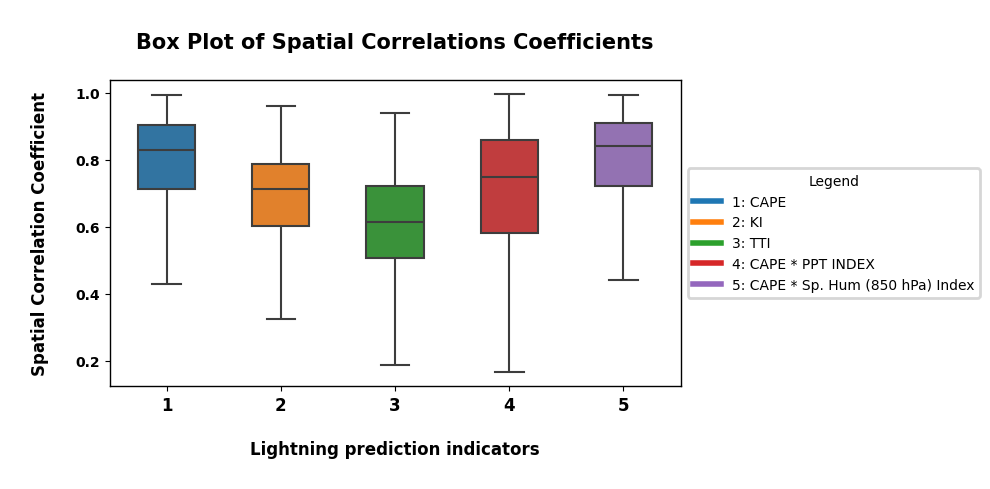

In [27]:
shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE * PPT INDEX', 'CAPE * Sp. Hum (850 hPa) Index']

flattened_correlations = [correlation.flatten() for correlation in correlation_list]

palette = sns.color_palette() 

plt.figure(figsize=(10, 5))

sns.boxplot(data=flattened_correlations, showfliers=False, palette=palette, width=0.5, linewidth=1.5)

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nBox Plot of Spatial Correlations Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nLightning prediction indicators\n', fontsize=12, fontweight='bold')
plt.ylabel('\nSpatial Correlation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
legend.get_frame().set_linewidth(2) 

plt.tight_layout()
plt.show()


/tmp/ipykernel_323322/768675552.py:15: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.violinplot(data=flattened_correlations, inner=None, palette=palette, width=0.5)


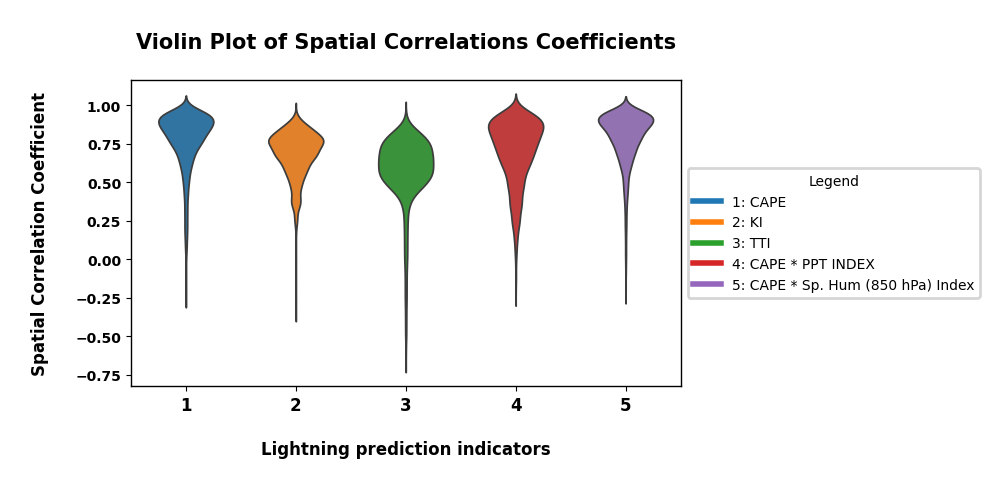

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE * PPT INDEX', 'CAPE * Sp. Hum (850 hPa) Index']

flattened_correlations = [correlation.flatten() for correlation in correlation_list]

palette = sns.color_palette()

plt.figure(figsize=(10, 5))

# Use violinplot instead of boxplot
sns.violinplot(data=flattened_correlations, inner=None, palette=palette, width=0.5)

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(shortforms)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nViolin Plot of Spatial Correlations Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nLightning prediction indicators\n', fontsize=12, fontweight='bold')
plt.ylabel('\nSpatial Correlation Coefficient\n', fontsize=12, fontweight='bold')

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# Customize the legend
handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
legend.get_frame().set_linewidth(2)

plt.tight_layout()
plt.show()


In [58]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        PRE_MONSOON_FINAL_FILES['Hourly_FlashCount'],  # No need to group by time.hour
        PRE_MONSOON_FINAL_FILES[var],
        dim='time'  # Correlate across time while preserving spatial dimensions (lat, lon)
    )
    correlation_values[var] = correlation


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/s

/tmp/ipykernel_62151/2270813477.py:14: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines


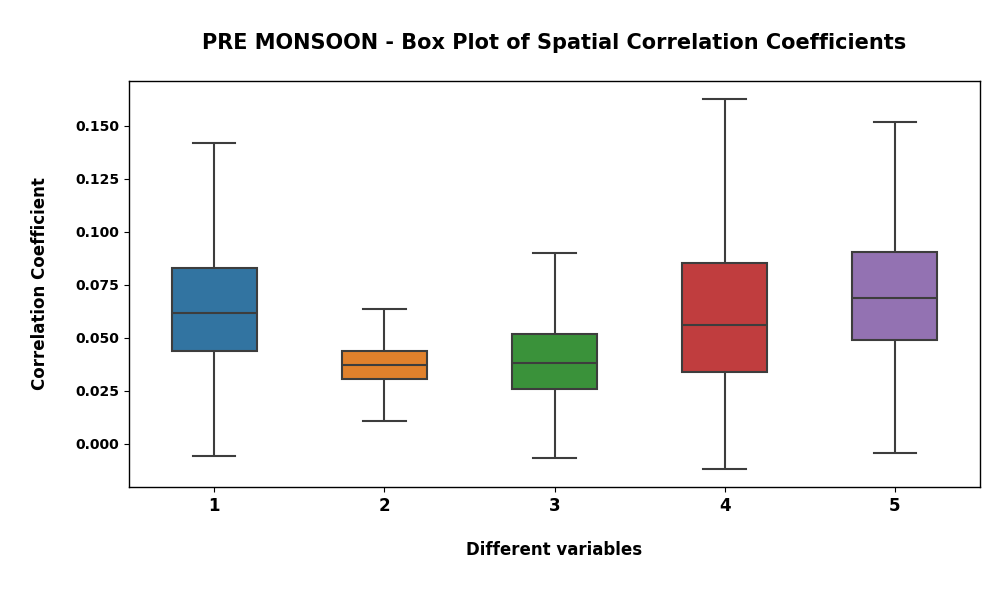

In [68]:

shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

correlation_data = []

for var in variables_to_compare:
    correlation_flattened = correlation_values[var].values.flatten()
    correlation_data.append(correlation_flattened)

plt.figure(figsize=(10, 6))  

palette = sns.color_palette() 

sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nPRE MONSOON - Box Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
# legend.get_frame().set_linewidth(2) 


plt.tight_layout()
plt.show()


In [62]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        MONSOON_FINAL_FILES['Hourly_FlashCount'],  # No need to group by time.hour
        MONSOON_FINAL_FILES[var],
        dim='time'  # Correlate across time while preserving spatial dimensions (lat, lon)
    )
    correlation_values[var] = correlation


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/s

/tmp/ipykernel_62151/3045987801.py:13: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines


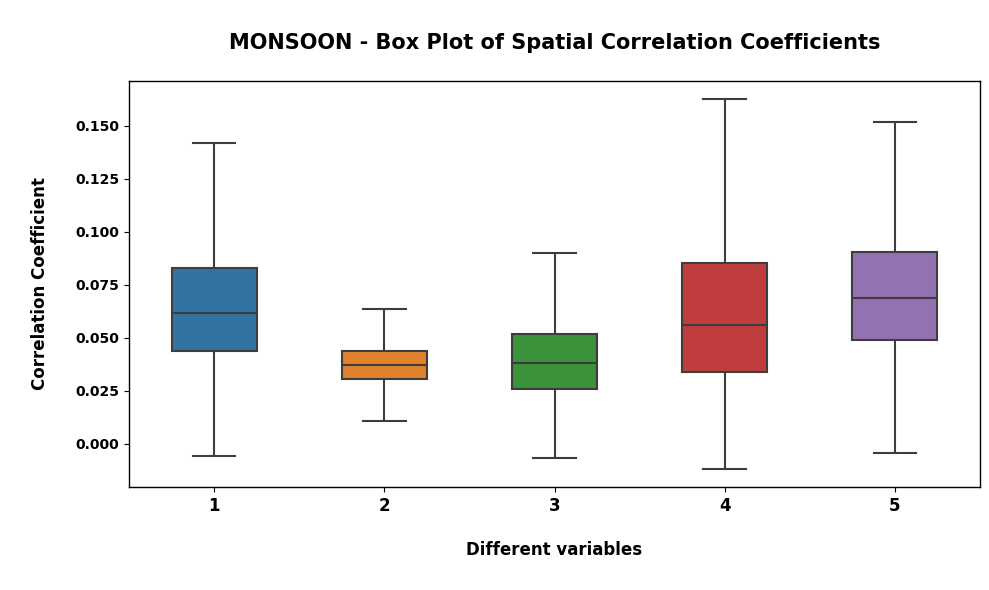

In [67]:

shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

correlation_data = []

for var in variables_to_compare:
    correlation_flattened = correlation_values[var].values.flatten()
    correlation_data.append(correlation_flattened)

plt.figure(figsize=(10, 6))  
palette = sns.color_palette() 

sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nMONSOON - Box Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
# legend.get_frame().set_linewidth(2) 


plt.tight_layout()
plt.show()


In [ ]:
correlation_list = []

for idx, var in enumerate(variables_to_compare):

    meteorological_var = FINAL_FILES[var].mean(dim=['x', 'y'])
    
    flash_count = FINAL_FILES['Hourly_FlashCount'].sum(dim=['x', 'y'])
    
    correlation = np.zeros((len(yedges), len(xedges)))

    for i in range(len(xedges)):
        for j in range(len(yedges)):
            correlation[j, i] = np.corrcoef(flash_count[:, j, i], meteorological_var[:, j, i], rowvar=False)[0, 1]

    correlation_list.append(correlation)

/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/functi

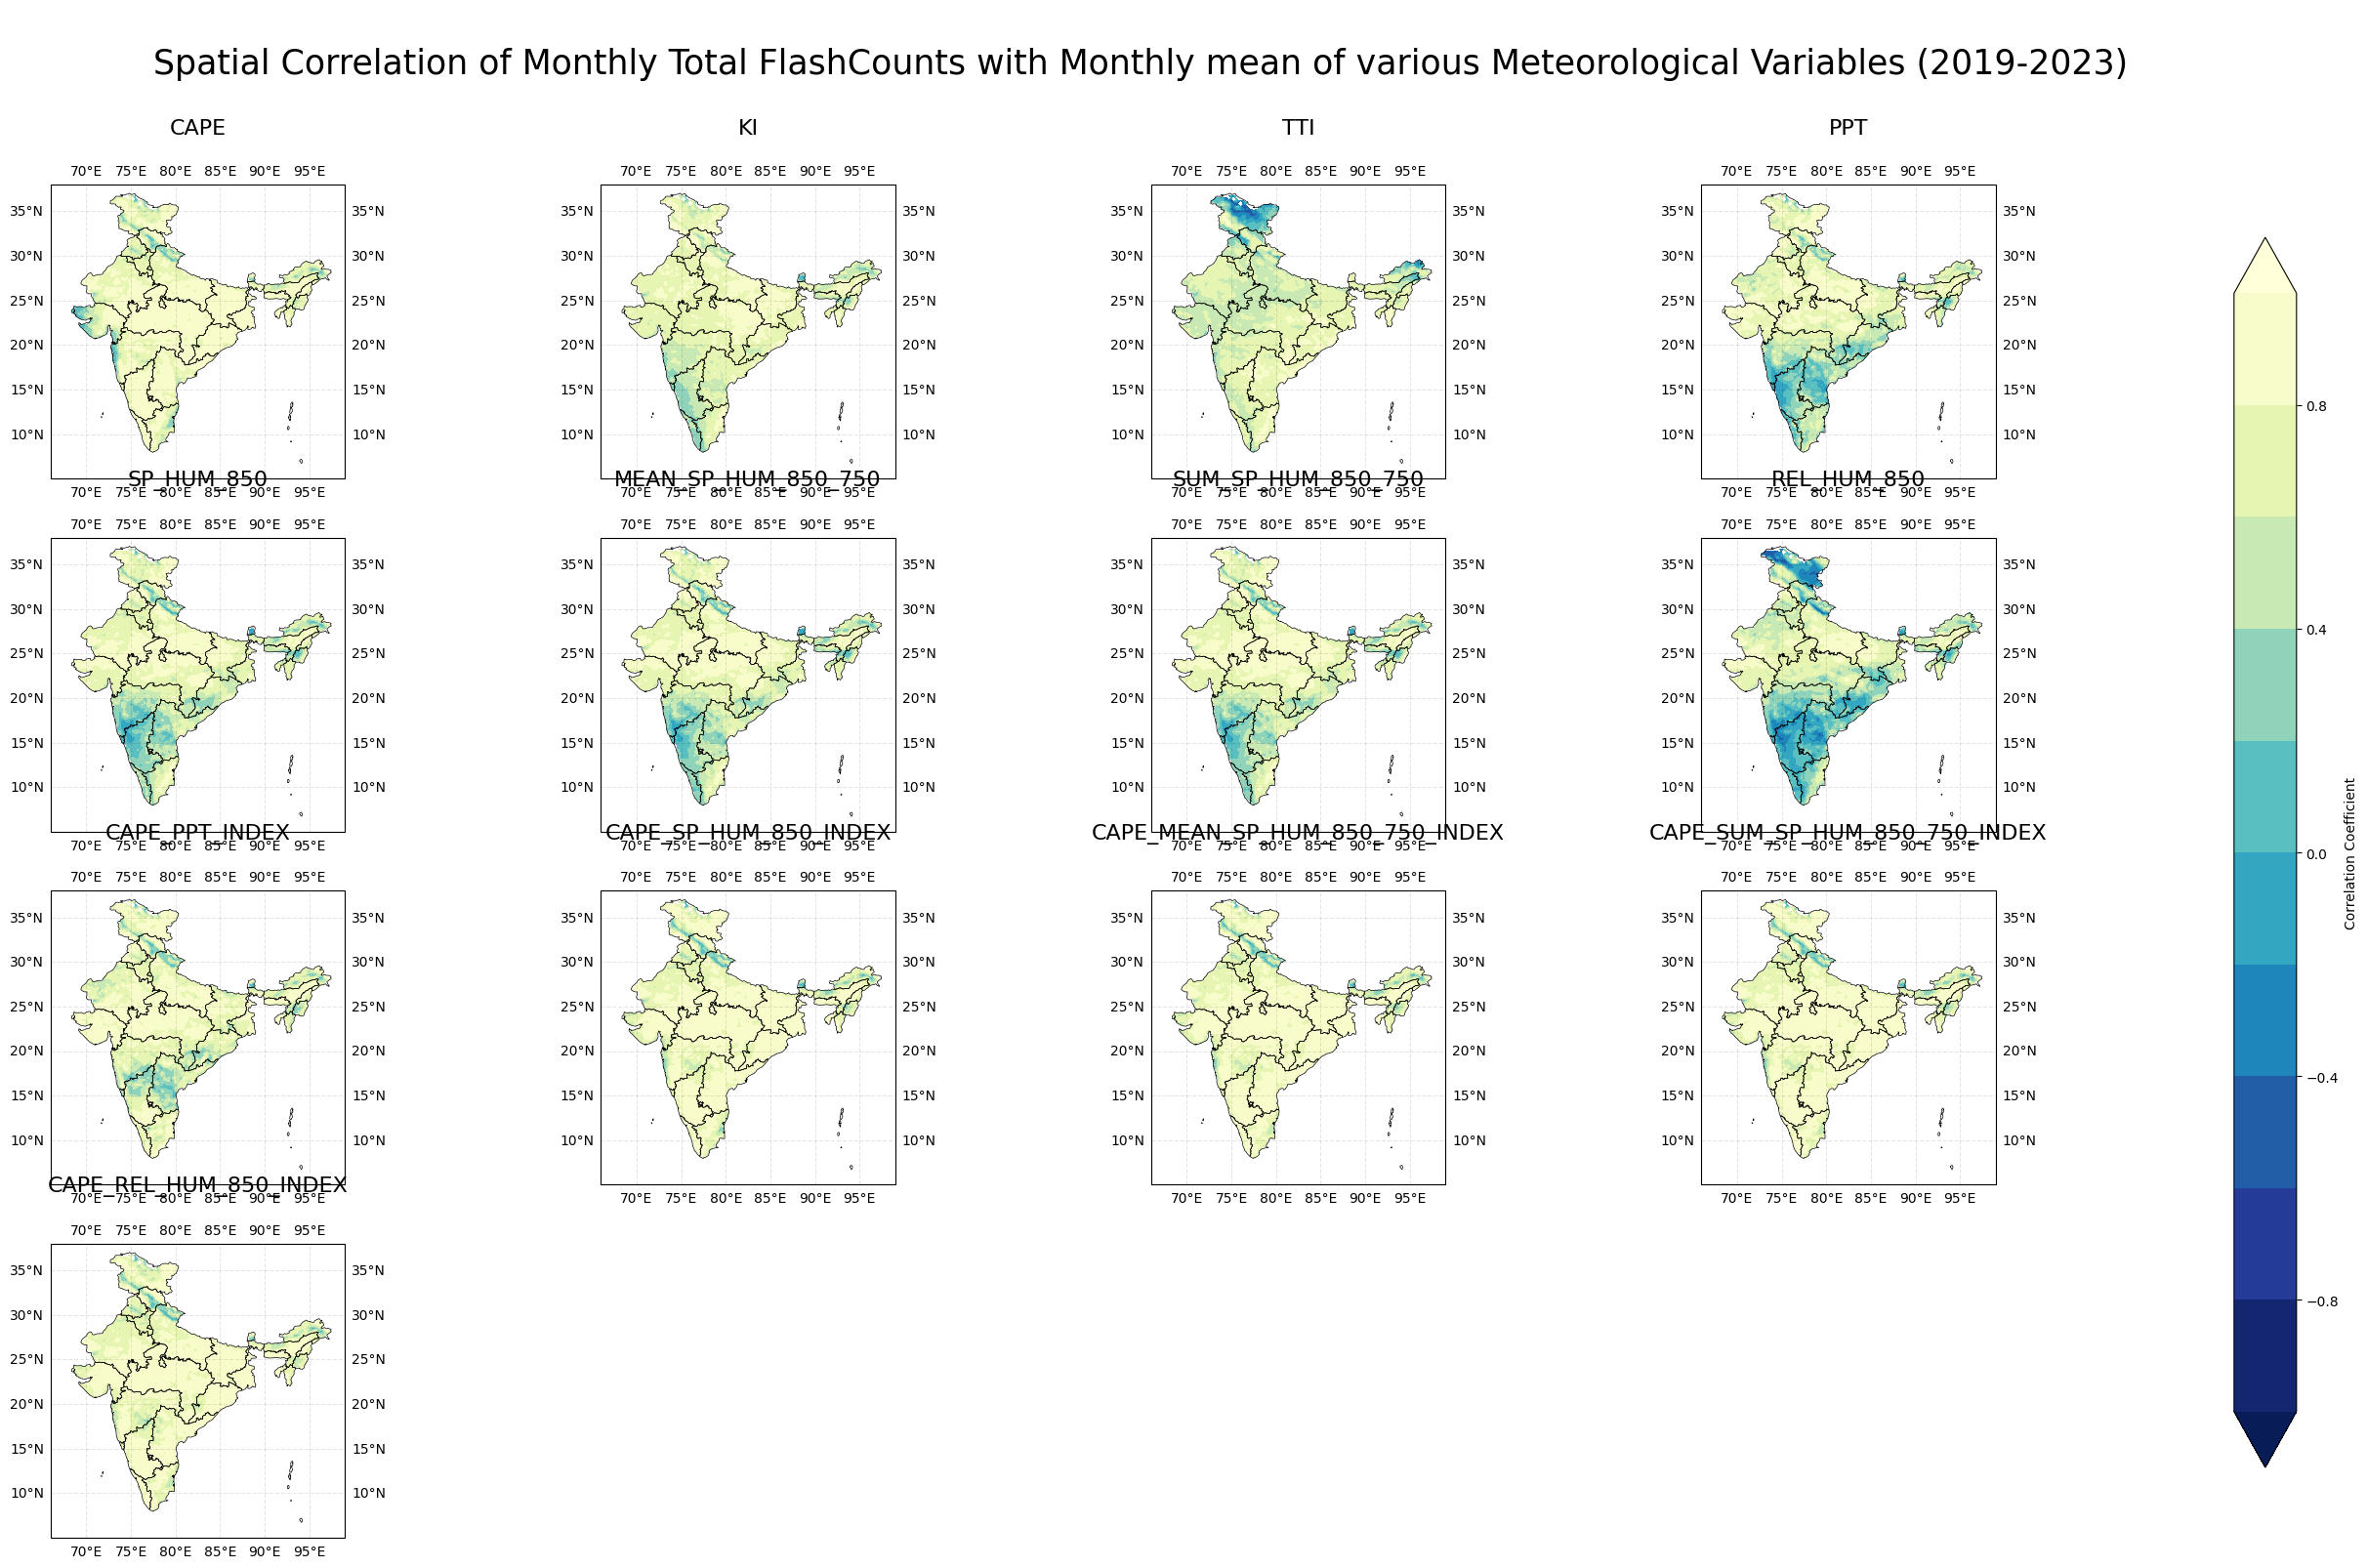

In [28]:
xedges = FINAL_FILES['x']
yedges = FINAL_FILES['y']

variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

n_columns = 4
n_rows = (len(variables_to_compare) + n_columns - 1) // n_columns  # Calculate required rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(32, 18), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(right=0.8)

correlation_list = []

for idx, var in enumerate(variables_to_compare):
    meteorological_var = FINAL_FILES[var].groupby('time.month').mean(dim=['time'])
    flash_count = FINAL_FILES['Hourly_FlashCount'].groupby('time.month').sum(dim='time')

    correlation = np.zeros((len(yedges), len(xedges)))

    for i in range(len(xedges)):
        for j in range(len(yedges)):
            correlation[j, i] = np.corrcoef(flash_count[:, j, i], meteorological_var[:, j, i], rowvar=False)[0, 1]

    correlation_list.append(correlation)

    row, col = divmod(idx, n_columns)  # Use 4 columns
    ax = axes[row, col]
    ax.set_extent([66, 99, 5, 38], crs=ccrs.PlateCarree())
    x, y = np.meshgrid(xedges, yedges)

    levels = np.linspace(-1, 1, 11)
    c = ax.contourf(x, y, correlation, levels=levels, cmap='YlGnBu_r', extend='both')

    gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)
    
    ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--')
    ax.set_title(f'\n{var}\n', fontsize=16)

# Optionally hide any unused subplots
for unused_ax in axes.flat[len(variables_to_compare):]:
    unused_ax.set_visible(False)

cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(c, cax=cbar_ax, label='Correlation Coefficient')

plt.suptitle('\nSpatial Correlation of Monthly Total FlashCounts with Monthly mean of various Meteorological Variables (2019-2023)', fontsize=25)
plt.show()


In [ ]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        FINAL_FILES['Hourly_FlashCount'],  
        FINAL_FILES[var],
        dim='time'  
    )
    correlation_values[var] = correlation


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/s

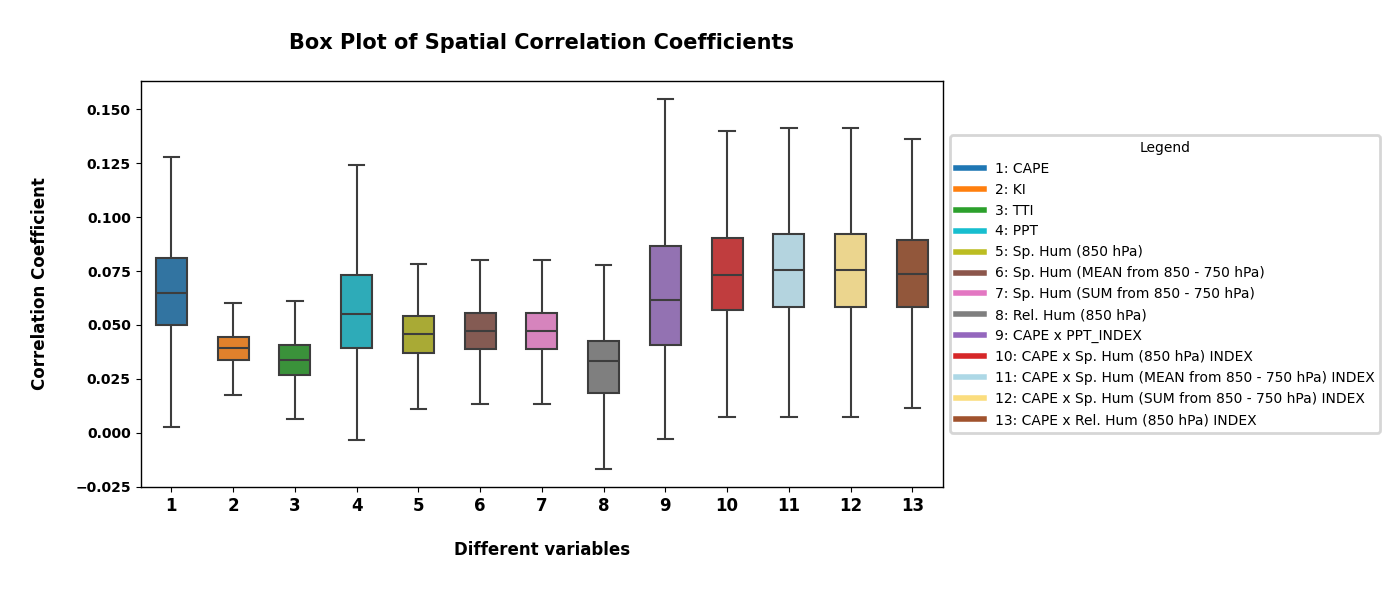

In [ ]:

shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

correlation_data = []

for var in variables_to_compare:
    correlation_flattened = correlation_values[var].values.flatten()
    correlation_data.append(correlation_flattened)

plt.figure(figsize=(14, 6))  
# palette = sns.color_palette() 

palette = [  
    "#1f77b4",  # blue  
    "#ff7f0e",  # orange  
    "#2ca02c",  # green  
    "#9467bd",  # purple 
    "#d62728",  # red 
]   
 
sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nBox Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
legend.get_frame().set_linewidth(2) 


plt.tight_layout()
plt.show()


In [21]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        FINAL_FILES['Hourly_FlashCount'],  
        FINAL_FILES[var],
        dim='time'  
    )
    correlation_values[var] = correlation


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/s

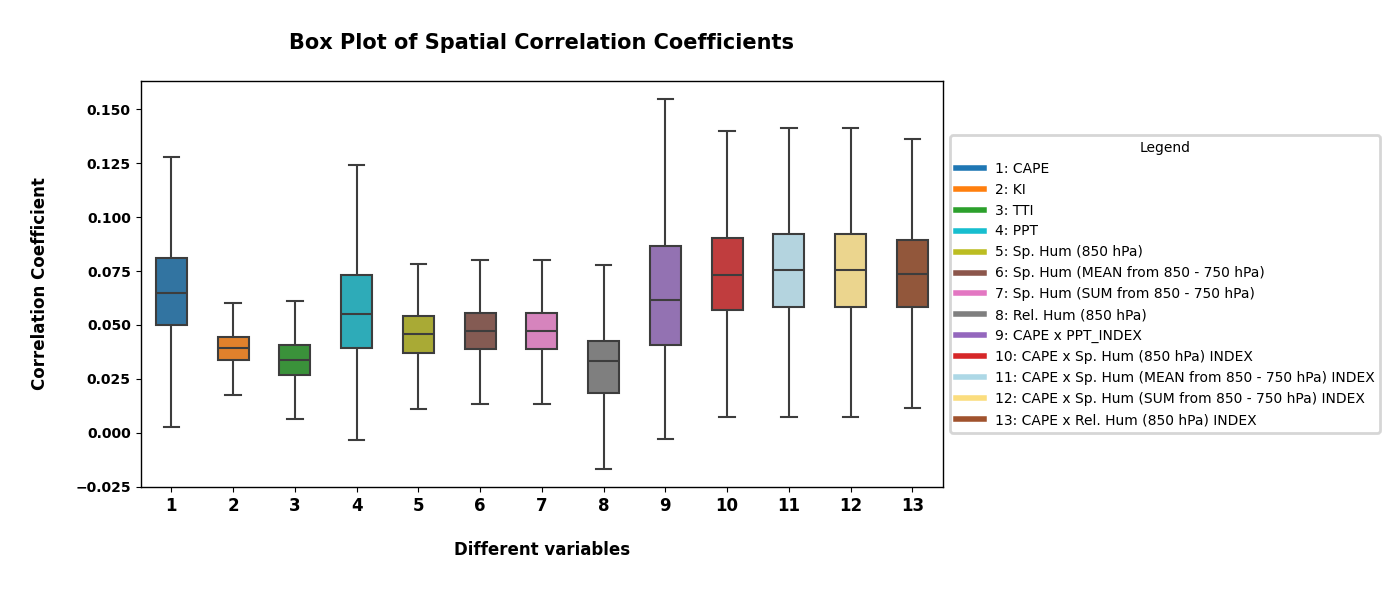

In [29]:

shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

correlation_data = []

for var in variables_to_compare:
    correlation_flattened = correlation_values[var].values.flatten()
    correlation_data.append(correlation_flattened)

plt.figure(figsize=(14, 6))  
# palette = sns.color_palette() 

palette = [  
    "#1f77b4",  # blue  
    "#ff7f0e",  # orange  
    "#2ca02c",  # green  
    "#17becf",  # cyan 
    "#bcbd22",  # olive 
    "#8c564b",  # brown  
    "#e377c2",  # pink  
    "#7f7f7f",  # gray  
    "#9467bd",  # purple 
    "#d62728",  # red 
    "#ADD8E6",  # light blue  
    "#FBDD7E",  # wheat  
    "#a0522d"   # sienna  
]   
 
sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nBox Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
legend.get_frame().set_linewidth(2) 


plt.tight_layout()
plt.show()


In [34]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        WINTER_FINAL_FILES['Hourly_FlashCount'],  # No need to group by time.hour
        WINTER_FINAL_FILES[var],
        dim='time'  # Correlate across time while preserving spatial dimensions (lat, lon)
    )
    correlation_values[var] = correlation


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/s

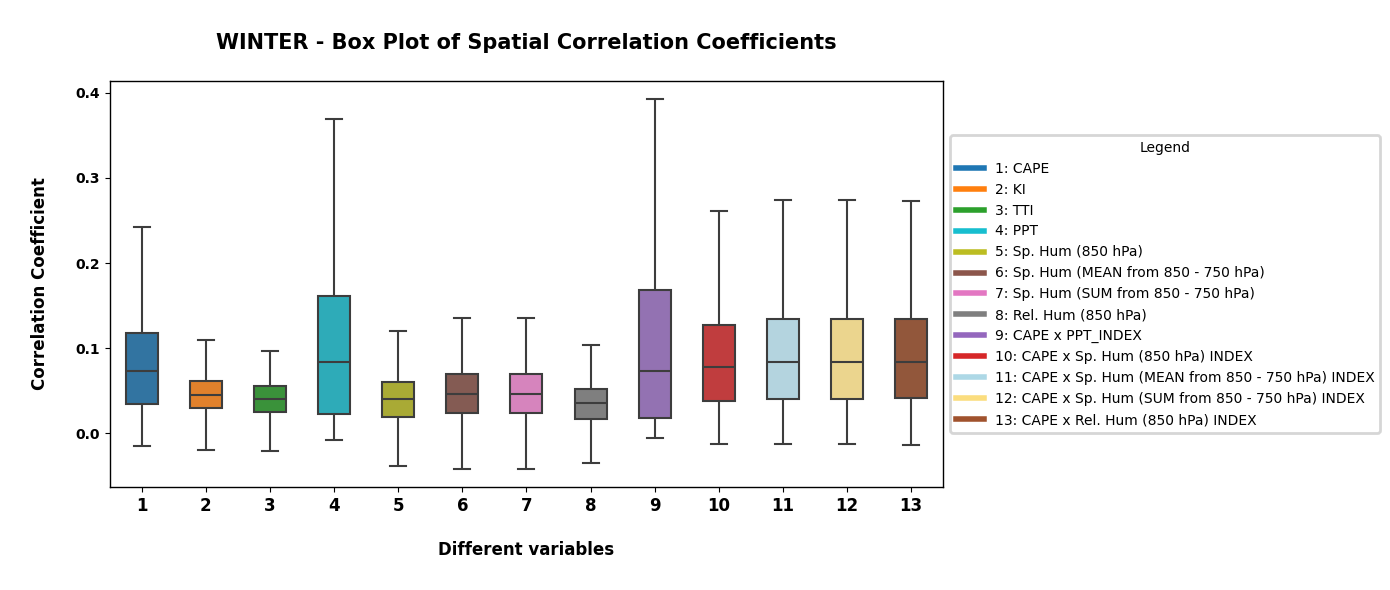

In [36]:

shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

correlation_data = []

for var in variables_to_compare:
    correlation_flattened = correlation_values[var].values.flatten()
    correlation_data.append(correlation_flattened)

plt.figure(figsize=(14, 6))  
# palette = sns.color_palette() 

palette = [  
    "#1f77b4",  # blue  
    "#ff7f0e",  # orange  
    "#2ca02c",  # green  
    "#17becf",  # cyan 
    "#bcbd22",  # olive 
    "#8c564b",  # brown  
    "#e377c2",  # pink  
    "#7f7f7f",  # gray  
    "#9467bd",  # purple 
    "#d62728",  # red 
    "#ADD8E6",  # light blue  
    "#FBDD7E",  # wheat  
    "#a0522d"   # sienna  
]   
sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nWINTER - Box Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
legend.get_frame().set_linewidth(2) 


plt.tight_layout()
plt.show()


In [37]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        PRE_MONSOON_FINAL_FILES['Hourly_FlashCount'],  # No need to group by time.hour
        PRE_MONSOON_FINAL_FILES[var],
        dim='time'  # Correlate across time while preserving spatial dimensions (lat, lon)
    )
    correlation_values[var] = correlation


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/s

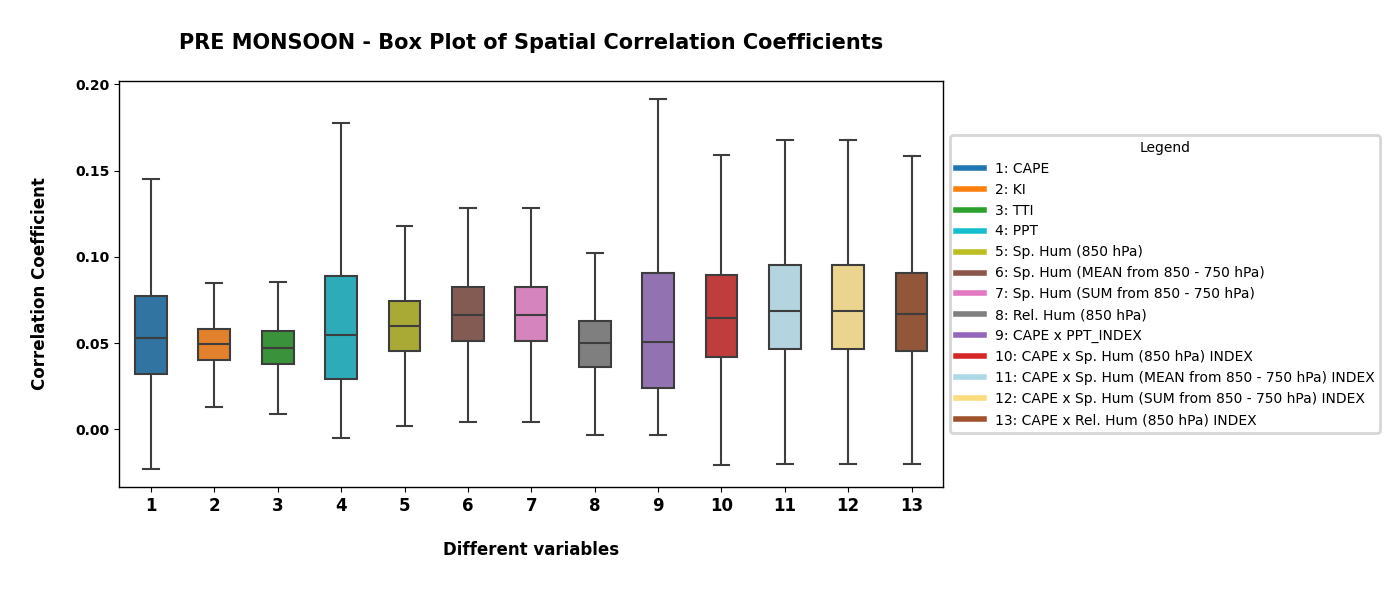

In [38]:

shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

correlation_data = []

for var in variables_to_compare:
    correlation_flattened = correlation_values[var].values.flatten()
    correlation_data.append(correlation_flattened)

plt.figure(figsize=(14, 6))  
# palette = sns.color_palette() 

palette = [  
    "#1f77b4",  # blue  
    "#ff7f0e",  # orange  
    "#2ca02c",  # green  
    "#17becf",  # cyan 
    "#bcbd22",  # olive 
    "#8c564b",  # brown  
    "#e377c2",  # pink  
    "#7f7f7f",  # gray  
    "#9467bd",  # purple 
    "#d62728",  # red 
    "#ADD8E6",  # light blue  
    "#FBDD7E",  # wheat  
    "#a0522d"   # sienna  
]   
sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nPRE MONSOON - Box Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
legend.get_frame().set_linewidth(2) 


plt.tight_layout()
plt.show()


In [39]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        MONSOON_FINAL_FILES['Hourly_FlashCount'],  # No need to group by time.hour
        MONSOON_FINAL_FILES[var],
        dim='time'  # Correlate across time while preserving spatial dimensions (lat, lon)
    )
    correlation_values[var] = correlation


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/s

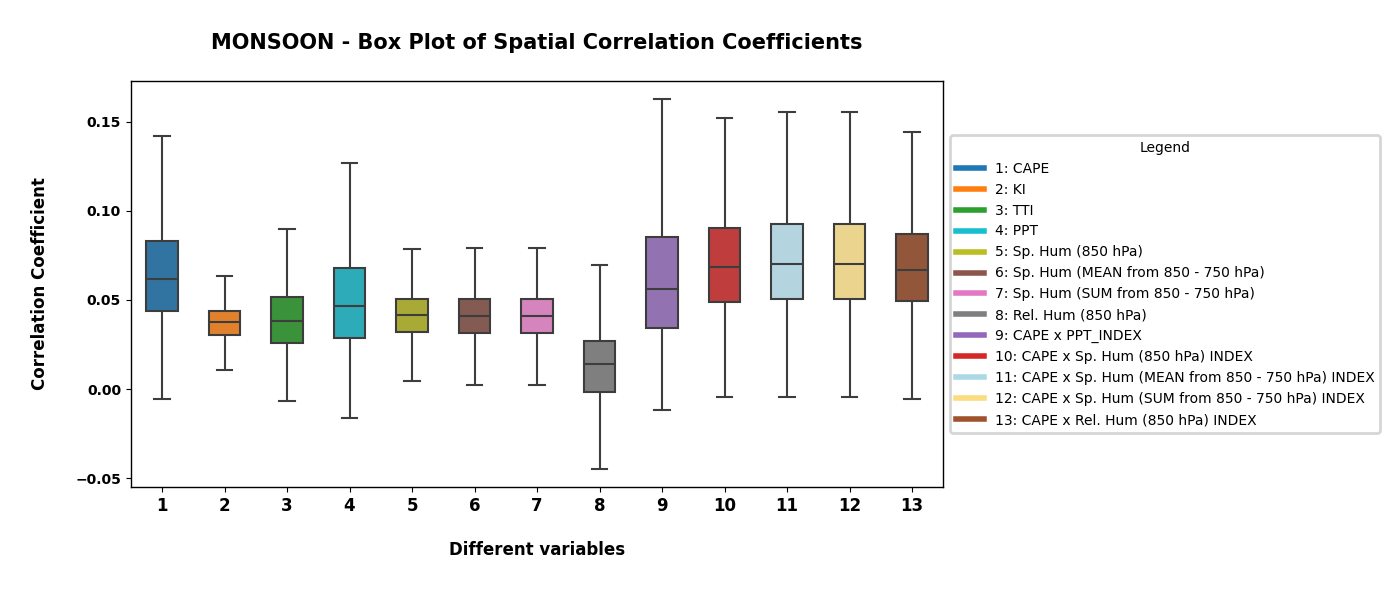

In [40]:

shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

correlation_data = []

for var in variables_to_compare:
    correlation_flattened = correlation_values[var].values.flatten()
    correlation_data.append(correlation_flattened)

plt.figure(figsize=(14, 6))  
# palette = sns.color_palette() 

palette = [  
    "#1f77b4",  # blue  
    "#ff7f0e",  # orange  
    "#2ca02c",  # green  
    "#17becf",  # cyan 
    "#bcbd22",  # olive 
    "#8c564b",  # brown  
    "#e377c2",  # pink  
    "#7f7f7f",  # gray  
    "#9467bd",  # purple 
    "#d62728",  # red 
    "#ADD8E6",  # light blue  
    "#FBDD7E",  # wheat  
    "#a0522d"   # sienna  
]   
sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nMONSOON - Box Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
legend.get_frame().set_linewidth(2) 


plt.tight_layout()
plt.show()


In [26]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        POST_MONSOON_FINAL_FILES['Hourly_FlashCount'],  # No need to group by time.hour
        POST_MONSOON_FINAL_FILES[var],
        dim='time'  # Correlate across time while preserving spatial dimensions (lat, lon)
    )
    correlation_values[var] = correlation


/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/krish/.local/lib/python3.10/s

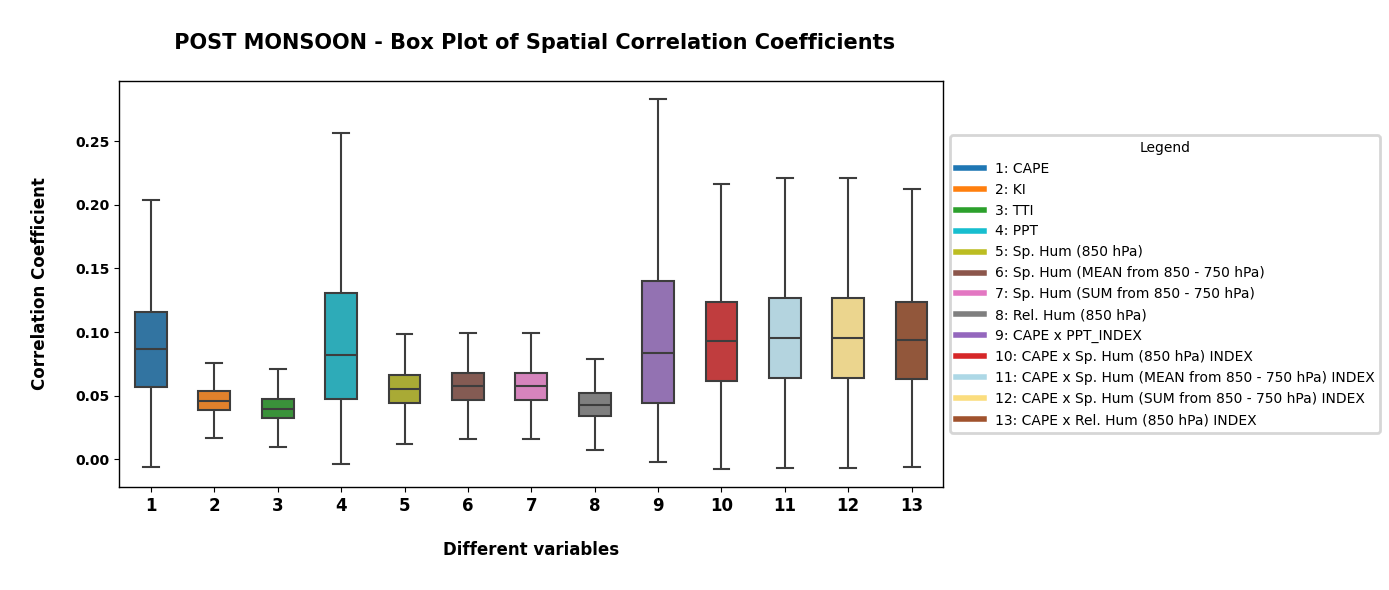

In [27]:

shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

correlation_data = []

for var in variables_to_compare:
    correlation_flattened = correlation_values[var].values.flatten()
    correlation_data.append(correlation_flattened)

plt.figure(figsize=(14, 6))  
# palette = sns.color_palette() 

palette = [  
    "#1f77b4",  # blue  
    "#ff7f0e",  # orange  
    "#2ca02c",  # green  
    "#17becf",  # cyan 
    "#bcbd22",  # olive 
    "#8c564b",  # brown  
    "#e377c2",  # pink  
    "#7f7f7f",  # gray  
    "#9467bd",  # purple 
    "#d62728",  # red 
    "#ADD8E6",  # light blue  
    "#FBDD7E",  # wheat  
    "#a0522d"   # sienna  
] 

sns.boxplot(data=correlation_data, showfliers=False, palette=palette, width=0.5, linewidth=1.5)  # Thicker box plot lines

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\n POST MONSOON - Box Plot of Spatial Correlation Coefficients\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Adjust the y-axis limits
# plt.ylim(-0.04, 0.16)

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
legend = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend', frameon=True)
legend.get_frame().set_linewidth(2) 


plt.tight_layout()
plt.show()


In [28]:
import matplotlib.pyplot as plt
import xarray as xr

variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

monthly_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        FINAL_FILES['Hourly_FlashCount'].groupby('time.month').sum(dim='time'),
        FINAL_FILES[var].groupby('time.month').mean(dim='time')
    )
    monthly_correlation_values[var] = float(correlation.values)

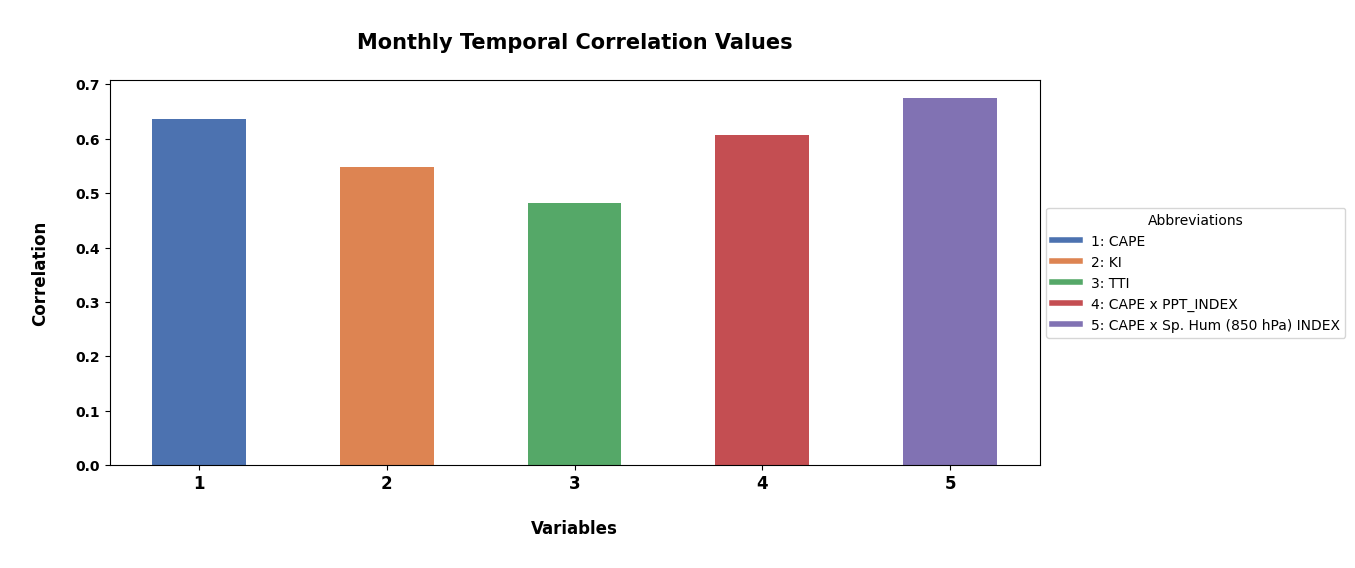

In [29]:
shortforms = ['1', '2', '3', '4', '5']

full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

palette = sns.color_palette('deep')

plt.figure(figsize=(12, 5))
plt.bar(monthly_correlation_values.keys(), monthly_correlation_values.values(), color=palette, width=0.5)
plt.yticks(fontsize = 10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize = 12, fontweight='bold')
plt.title('\nMonthly Temporal Correlation Values\n', fontsize = 15, fontweight='bold')
plt.xlabel('\nVariables\n', fontsize = 12, fontweight='bold')
plt.ylabel('\nCorrelation\n', fontsize = 12, fontweight='bold')

handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

plt.show()


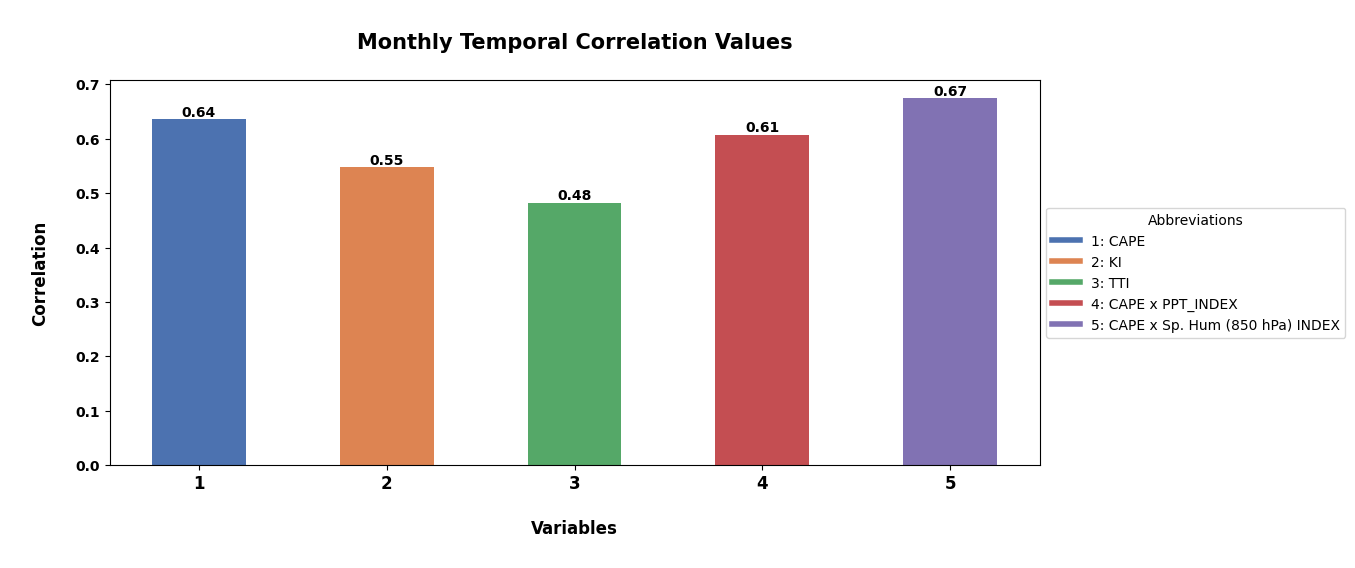

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming monthly_correlation_values and other required variables are defined

shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']
palette = sns.color_palette('deep')

# Create a figure
plt.figure(figsize=(12, 5))

# Plot the bar chart
bars = plt.bar(monthly_correlation_values.keys(), monthly_correlation_values.values(), color=palette, width=0.5)

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()  # Get the height of the bar (the y-value)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize ticks and labels
plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(shortforms)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')

# Title and labels
plt.title('\nMonthly Temporal Correlation Values\n', fontsize=15, fontweight='bold')
plt.xlabel('\nVariables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation\n', fontsize=12, fontweight='bold')

# Add legend
handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

# Display the plot
plt.show()


In [44]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

PRE_MONSOON_daily_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        PRE_MONSOON_FINAL_FILES['Hourly_FlashCount'].groupby('time.day').sum(dim='time'),
        PRE_MONSOON_FINAL_FILES[var].groupby('time.day').mean(dim='time')
    )
    PRE_MONSOON_daily_correlation_values[var] = float(correlation.values)


In [45]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

PRE_MONSOON_monthly_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        PRE_MONSOON_FINAL_FILES['Hourly_FlashCount'].groupby('time.month').sum(dim='time'),
        PRE_MONSOON_FINAL_FILES[var].groupby('time.month').mean(dim='time')
    )
    PRE_MONSOON_monthly_correlation_values[var] = float(correlation.values)

In [46]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

MONSOON_daily_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        MONSOON_FINAL_FILES['Hourly_FlashCount'].groupby('time.day').sum(dim='time'),
        MONSOON_FINAL_FILES[var].groupby('time.day').mean(dim='time')
    )
    MONSOON_daily_correlation_values[var] = float(correlation.values)


In [47]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'PPT', 'SP_HUM_850', 'MEAN_SP_HUM_850_750', 'SUM_SP_HUM_850_750', 'REL_HUM_850', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX', 
                        'CAPE_MEAN_SP_HUM_850_750_INDEX', 'CAPE_SUM_SP_HUM_850_750_INDEX', 'CAPE_REL_HUM_850_INDEX']

MONSOON_monthly_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        MONSOON_FINAL_FILES['Hourly_FlashCount'].groupby('time.month').sum(dim='time'),
        MONSOON_FINAL_FILES[var].groupby('time.month').mean(dim='time')
    )
    MONSOON_monthly_correlation_values[var] = float(correlation.values)

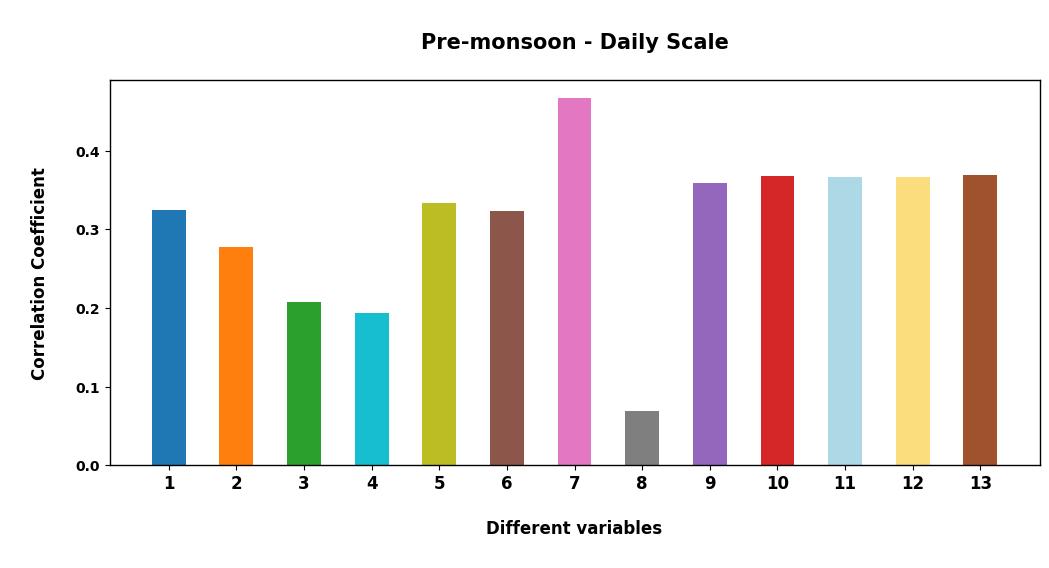

In [48]:
shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

# palette = sns.color_palette('deep')

plt.figure(figsize=(12, 5))
plt.bar(PRE_MONSOON_daily_correlation_values.keys(), PRE_MONSOON_daily_correlation_values.values(), color=palette, width=0.5)
plt.yticks(fontsize = 10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize = 12, fontweight='bold')
plt.title('\nPre-monsoon - Daily Scale\n', fontsize = 15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize = 12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize = 12, fontweight='bold')

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

plt.show()

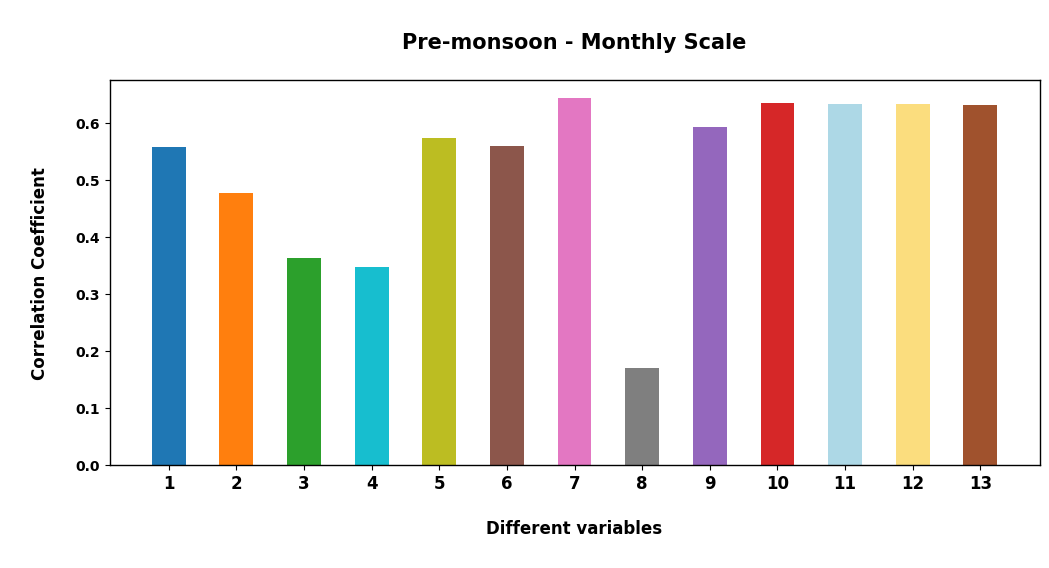

In [49]:
shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

# palette = sns.color_palette('deep')

plt.figure(figsize=(12, 5))
plt.bar(PRE_MONSOON_monthly_correlation_values.keys(), PRE_MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
plt.yticks(fontsize = 10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize = 12, fontweight='bold')
plt.title('\nPre-monsoon - Monthly Scale\n', fontsize = 15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize = 12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize = 12, fontweight='bold')

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

plt.show()

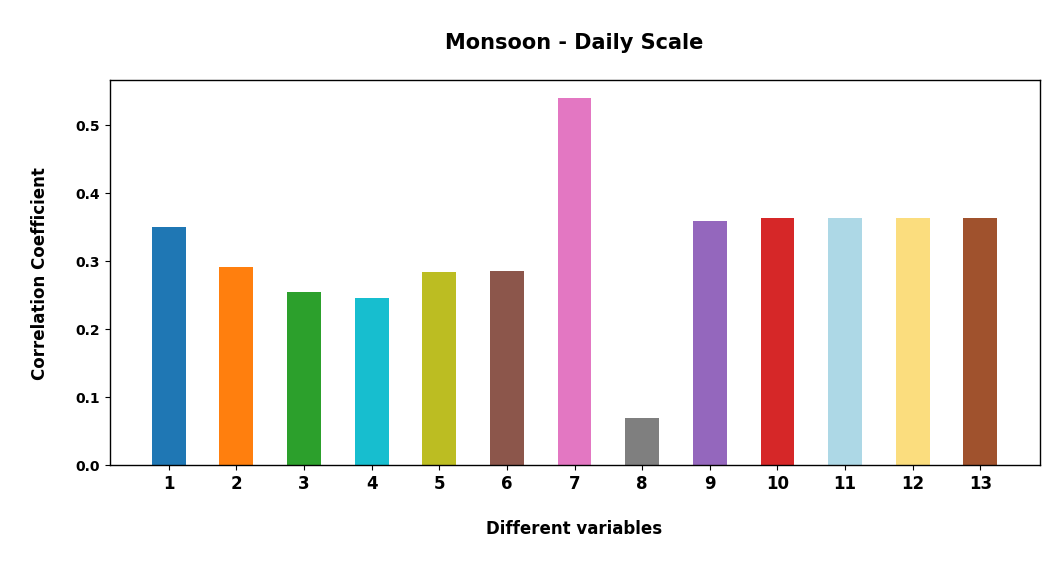

In [50]:
shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

# palette = sns.color_palette('deep')

plt.figure(figsize=(12, 5))
plt.bar(MONSOON_daily_correlation_values.keys(), MONSOON_daily_correlation_values.values(), color=palette, width=0.5)
plt.yticks(fontsize = 10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize = 12, fontweight='bold')
plt.title('\nMonsoon - Daily Scale\n', fontsize = 15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize = 12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize = 12, fontweight='bold')

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

plt.show()

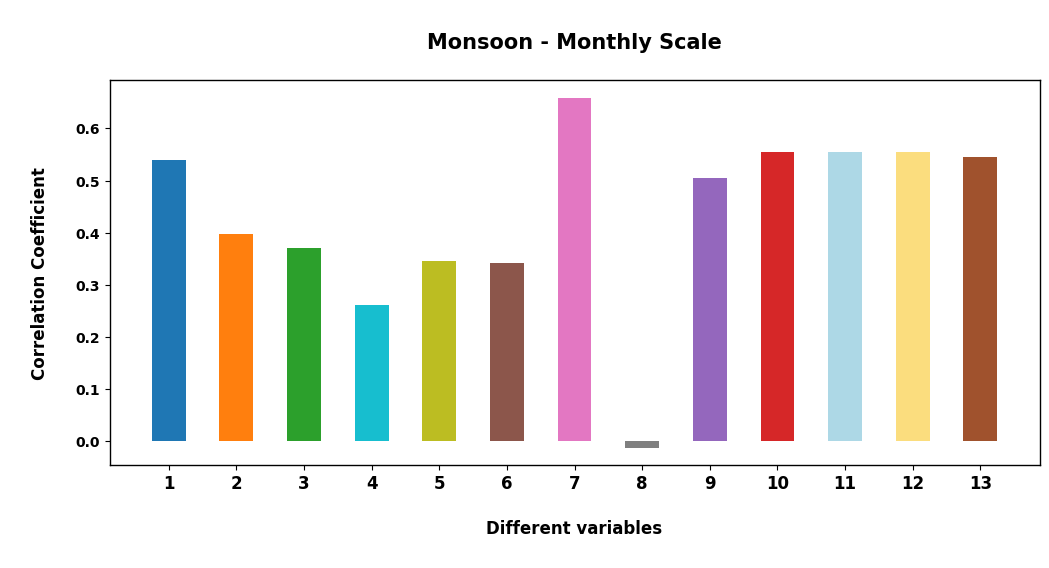

In [51]:
shortforms = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
full_names = ['CAPE', 'KI', 'TTI', 'PPT', 'Sp. Hum (850 hPa)', 'Sp. Hum (MEAN from 850 - 750 hPa)', 'Sp. Hum (SUM from 850 - 750 hPa)', 'Rel. Hum (850 hPa)', 'CAPE x PPT_INDEX', 
              'CAPE x Sp. Hum (850 hPa) INDEX', 'CAPE x Sp. Hum (MEAN from 850 - 750 hPa) INDEX', 'CAPE x Sp. Hum (SUM from 850 - 750 hPa) INDEX', 'CAPE x Rel. Hum (850 hPa) INDEX']

# palette = sns.color_palette('deep')

plt.figure(figsize=(12, 5))
plt.bar(MONSOON_monthly_correlation_values.keys(), MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
plt.yticks(fontsize = 10, fontweight='bold')
plt.xticks(ticks=np.arange(len(variables_to_compare)), labels=shortforms, rotation=0, fontsize = 12, fontweight='bold')
plt.title('\nMonsoon - Monthly Scale\n', fontsize = 15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize = 12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize = 12, fontweight='bold')

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

plt.show()

In [42]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

PRE_MONSOON_daily_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        PRE_MONSOON_FINAL_FILES['Hourly_FlashCount'].groupby('time.day').sum(dim='time'),
        PRE_MONSOON_FINAL_FILES[var].groupby('time.day').mean(dim='time')
    )
    PRE_MONSOON_daily_correlation_values[var] = float(correlation.values)


In [49]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

PRE_MONSOON_monthly_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        PRE_MONSOON_FINAL_FILES['Hourly_FlashCount'].groupby('time.month').sum(dim='time'),
        PRE_MONSOON_FINAL_FILES[var].groupby('time.month').mean(dim='time')
    )
    PRE_MONSOON_monthly_correlation_values[var] = float(correlation.values)

In [54]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']

MONSOON_daily_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        MONSOON_FINAL_FILES['Hourly_FlashCount'].groupby('time.day').sum(dim='time'),
        MONSOON_FINAL_FILES[var].groupby('time.day').mean(dim='time')
    )
    MONSOON_daily_correlation_values[var] = float(correlation.values)


In [55]:
variables_to_compare = ['CAPE', 'KI', 'TTI', 'CAPE_PPT_INDEX', 'CAPE_SP_HUM_850_INDEX']
MONSOON_monthly_correlation_values = {}

for var in variables_to_compare:
    correlation = xr.corr(
        MONSOON_FINAL_FILES['Hourly_FlashCount'].groupby('time.month').sum(dim='time'),
        MONSOON_FINAL_FILES[var].groupby('time.month').mean(dim='time')
    )
    MONSOON_monthly_correlation_values[var] = float(correlation.values)

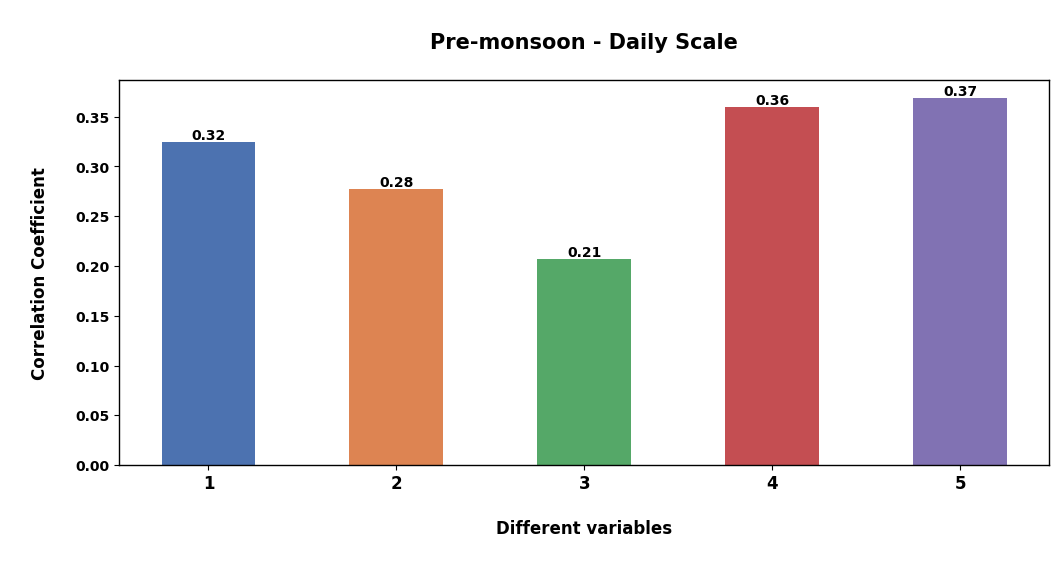

In [45]:

shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

palette = sns.color_palette('deep')

plt.figure(figsize=(12, 5))

bars = plt.bar(PRE_MONSOON_daily_correlation_values.keys(), PRE_MONSOON_daily_correlation_values.values(), color=palette, width=0.5)

for bar in bars:
    height = bar.get_height()  # Get the height of the bar (the y-value)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(shortforms)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nPre-monsoon - Daily Scale\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# Optional: Add a legend if needed
# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

# Show the plot
plt.show()


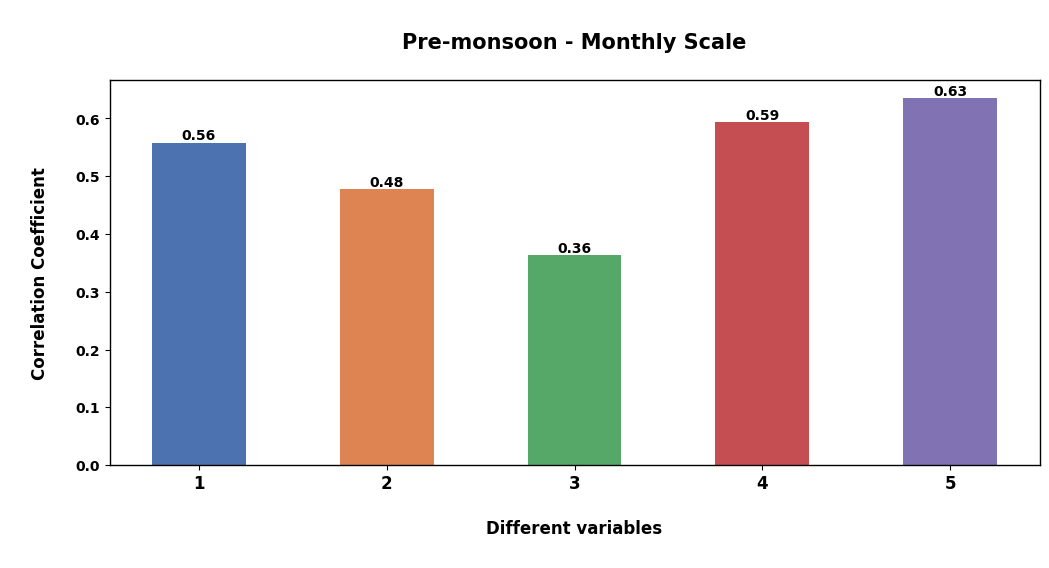

In [51]:

shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

palette = sns.color_palette('deep')

plt.figure(figsize=(12, 5))

bars = plt.bar(PRE_MONSOON_monthly_correlation_values.keys(), PRE_MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)

for bar in bars:
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(shortforms)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nPre-monsoon - Monthly Scale\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# Optional: Add a legend (if needed)
# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

# Show the plot
plt.show()


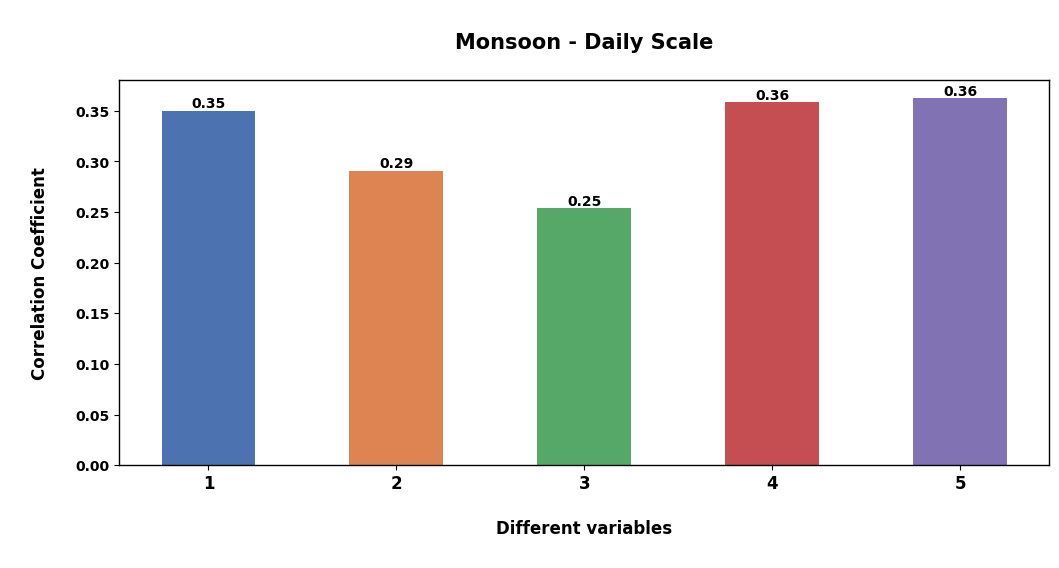

In [56]:

# Shortform and full name lists
shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

# Define color palette (optional)
palette = sns.color_palette('deep')

# Create the figure and axes
plt.figure(figsize=(12, 5))

# Plot the bar chart and store the result in 'bars'
bars = plt.bar(MONSOON_daily_correlation_values.keys(), MONSOON_daily_correlation_values.values(), color=palette, width=0.5)

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()  # Get the height of the bar (the y-value)
    # Place the text on top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize ticks, labels, and title
plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(shortforms)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nMonsoon - Daily Scale\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# Optional: Add a legend (if needed)
# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

# Show the plot
plt.show()


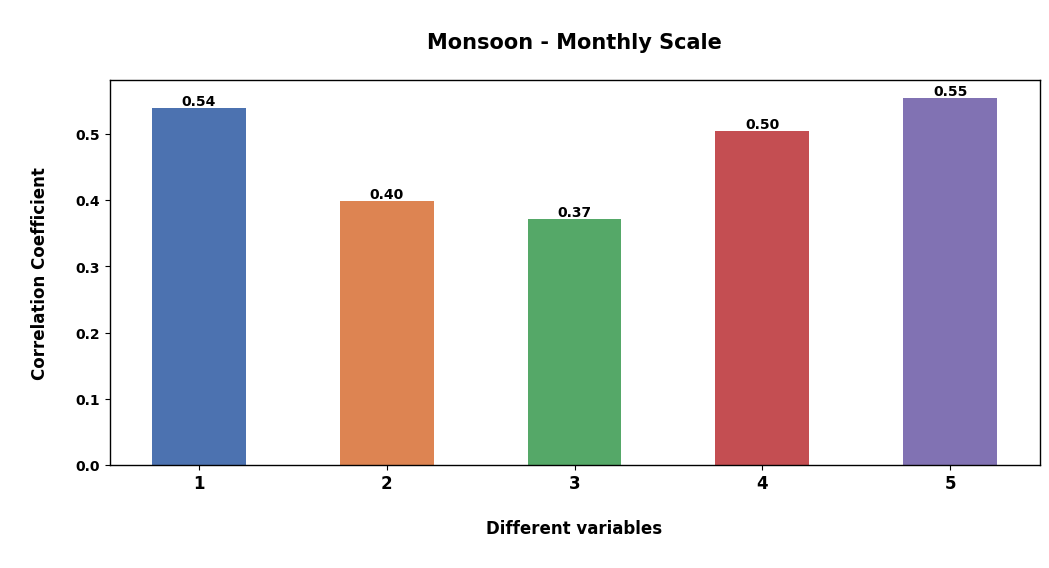

In [57]:

# Shortform and full name lists
shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

# Define color palette
palette = sns.color_palette('deep')

# Create the figure and axes
plt.figure(figsize=(12, 5))

# Plot the bar chart and store the result in 'bars'
bars = plt.bar(MONSOON_monthly_correlation_values.keys(), MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()  # Get the height of the bar (the y-value)
    # Place the text on top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize ticks, labels, and title
plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(ticks=np.arange(len(shortforms)), labels=shortforms, rotation=0, fontsize=12, fontweight='bold')
plt.title('\nMonsoon - Monthly Scale\n', fontsize=15, fontweight='bold')
plt.xlabel('\nDifferent variables\n', fontsize=12, fontweight='bold')
plt.ylabel('\nCorrelation Coefficient\n', fontsize=12, fontweight='bold')

# Thicken the frame of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# Optional: Add a legend (if needed)
# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

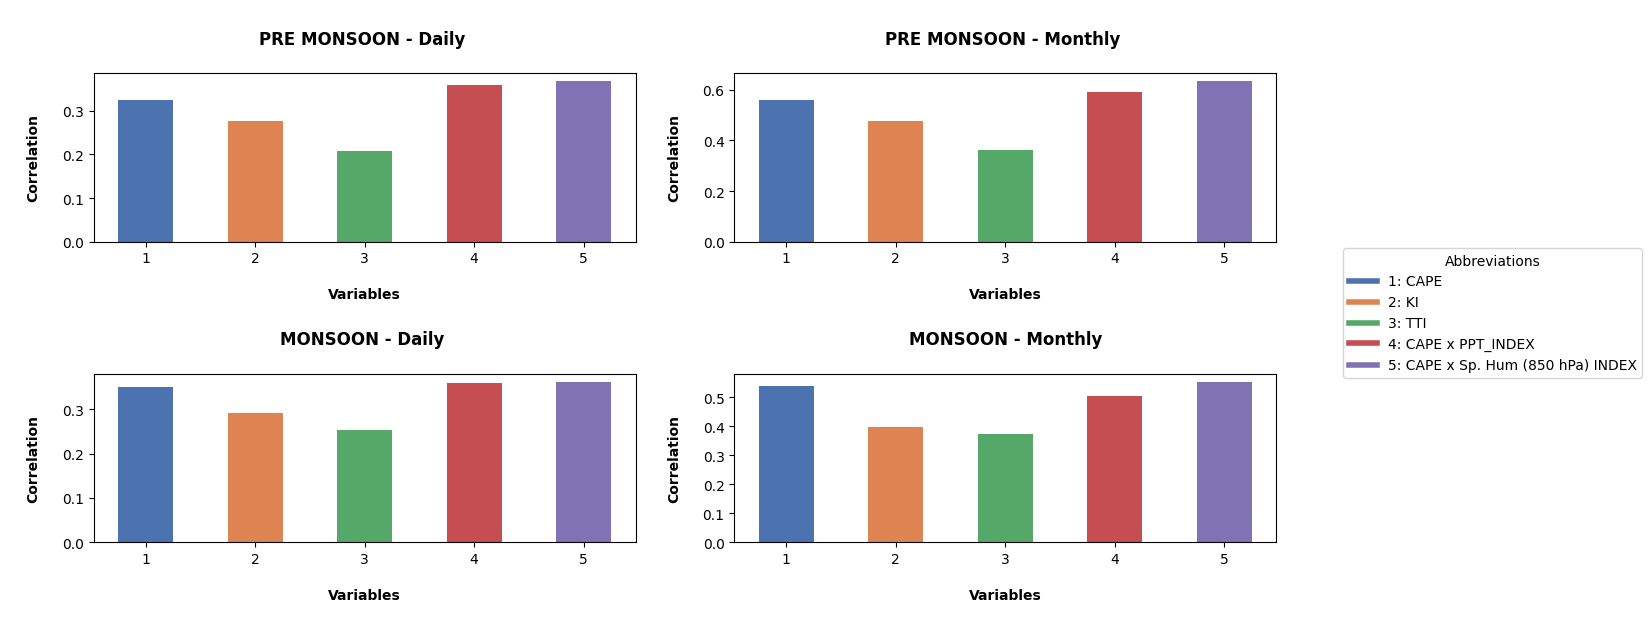

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data variables and settings
shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

plt.suptitle('\nTemporal Correlation \n', fontsize=15, fontweight='bold')

variables_to_compare = shortforms  # Example variable list (replace with your data variable list)
palette = sns.color_palette('deep')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

# Plot each subplot
axs[0, 0].bar(PRE_MONSOON_daily_correlation_values.keys(), PRE_MONSOON_daily_correlation_values.values(), color=palette, width=0.5)
axs[0, 0].set_xticks(np.arange(len(variables_to_compare)))
axs[0, 0].set_xticklabels(shortforms)
axs[0, 0].set_title('\nPRE MONSOON - Daily \n', fontsize = 12, fontweight='bold')
axs[0, 0].set_xlabel('\nVariables\n', fontsize = 10, fontweight='bold')
axs[0, 0].set_ylabel('\nCorrelation\n', fontsize = 10, fontweight='bold')

axs[0, 1].bar(PRE_MONSOON_monthly_correlation_values.keys(), PRE_MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
axs[0, 1].set_xticks(np.arange(len(variables_to_compare)))
axs[0, 1].set_xticklabels(shortforms)
axs[0, 1].set_title('\nPRE MONSOON - Monthly \n', fontsize = 12, fontweight='bold')
axs[0, 1].set_xlabel('\nVariables\n', fontsize = 10, fontweight='bold')
axs[0, 1].set_ylabel('\nCorrelation\n', fontsize = 10, fontweight='bold')

axs[1, 0].bar(MONSOON_daily_correlation_values.keys(), MONSOON_daily_correlation_values.values(), color=palette, width=0.5)
axs[1, 0].set_xticks(np.arange(len(variables_to_compare)))
axs[1, 0].set_xticklabels(shortforms)
axs[1, 0].set_title('\nMONSOON - Daily \n', fontsize = 12, fontweight='bold')
axs[1, 0].set_xlabel('\nVariables\n', fontsize = 10, fontweight='bold')
axs[1, 0].set_ylabel('\nCorrelation\n', fontsize = 10, fontweight='bold')

axs[1, 1].bar(MONSOON_monthly_correlation_values.keys(), MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
axs[1, 1].set_xticks(np.arange(len(variables_to_compare)))
axs[1, 1].set_xticklabels(shortforms)
axs[1, 1].set_title('\nMONSOON - Monthly\n', fontsize = 12, fontweight='bold')
axs[1, 1].set_xlabel('\nVariables\n', fontsize = 10, fontweight='bold')
axs[1, 1].set_ylabel('\nCorrelation\n', fontsize = 10, fontweight='bold')

# Add borders around each subplot
for ax in axs.flat:
    ax.set_frame_on(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Add legend on the right
handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
fig.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0.1, 0.1, 0.97, 1])

plt.subplots_adjust(top=0.80)  # Adjust top to make room for the suptitle

# Show plot
plt.show()


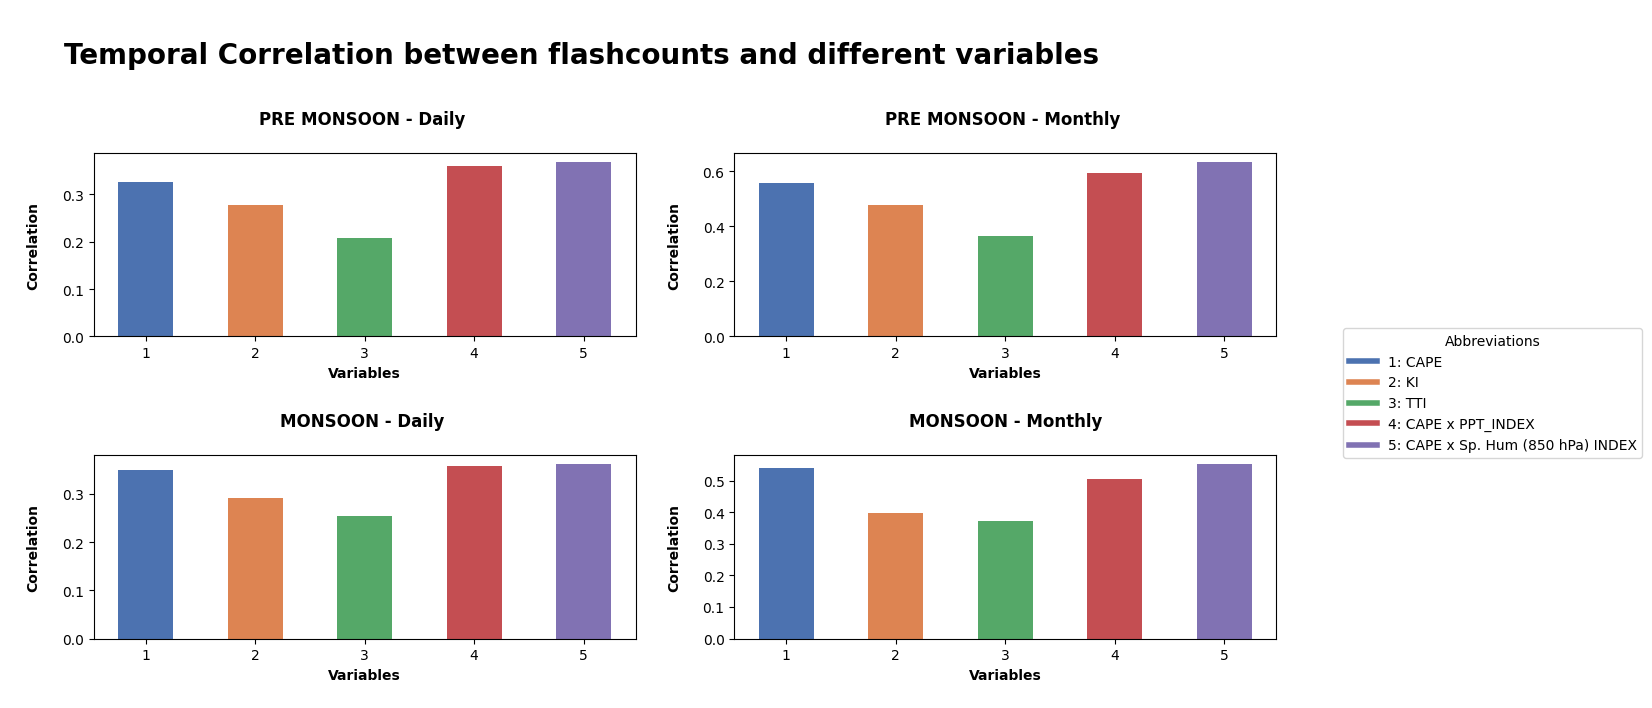

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data variables and settings
shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

variables_to_compare = shortforms  # Example variable list (replace with your data variable list)
palette = sns.color_palette('deep')

axs[0, 0].bar(PRE_MONSOON_daily_correlation_values.keys(), PRE_MONSOON_daily_correlation_values.values(), color=palette, width=0.5)
axs[0, 0].set_xticks(np.arange(len(variables_to_compare)))
axs[0, 0].set_xticklabels(shortforms)
axs[0, 0].set_title('\nPRE MONSOON - Daily \n', fontsize = 12, fontweight='bold')
axs[0, 0].set_xlabel('Variables\n', fontsize = 10, fontweight='bold')
axs[0, 0].set_ylabel('\nCorrelation\n', fontsize = 10, fontweight='bold')

axs[0, 1].bar(PRE_MONSOON_monthly_correlation_values.keys(), PRE_MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
axs[0, 1].set_xticks(np.arange(len(variables_to_compare)))
axs[0, 1].set_xticklabels(shortforms)
axs[0, 1].set_title('\nPRE MONSOON - Monthly \n', fontsize = 12, fontweight='bold')
axs[0, 1].set_xlabel('Variables\n', fontsize = 10, fontweight='bold')
axs[0, 1].set_ylabel('\nCorrelation\n', fontsize = 10, fontweight='bold')

axs[1, 0].bar(MONSOON_daily_correlation_values.keys(), MONSOON_daily_correlation_values.values(), color=palette, width=0.5)
axs[1, 0].set_xticks(np.arange(len(variables_to_compare)))
axs[1, 0].set_xticklabels(shortforms)
axs[1, 0].set_title('\nMONSOON - Daily \n', fontsize = 12, fontweight='bold')
axs[1, 0].set_xlabel('Variables\n', fontsize = 10, fontweight='bold')
axs[1, 0].set_ylabel('\nCorrelation\n', fontsize = 10, fontweight='bold')

axs[1, 1].bar(MONSOON_monthly_correlation_values.keys(), MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
axs[1, 1].set_xticks(np.arange(len(variables_to_compare)))
axs[1, 1].set_xticklabels(shortforms)
axs[1, 1].set_title('\nMONSOON - Monthly\n', fontsize = 12, fontweight='bold')
axs[1, 1].set_xlabel('Variables\n', fontsize = 10, fontweight='bold')
axs[1, 1].set_ylabel('\nCorrelation\n', fontsize = 10, fontweight='bold')

# Add borders around each subplot
for ax in axs.flat:
    ax.set_frame_on(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Add legend on the right
handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
fig.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0.1, 0.1, 0.97, 1])

plt.subplots_adjust(top=0.80)  # Adjust top to make room for the suptitle
plt.suptitle('\nTemporal Correlation between flashcounts and different variables \n', fontsize=20, fontweight='bold')

# Show plot
plt.show()


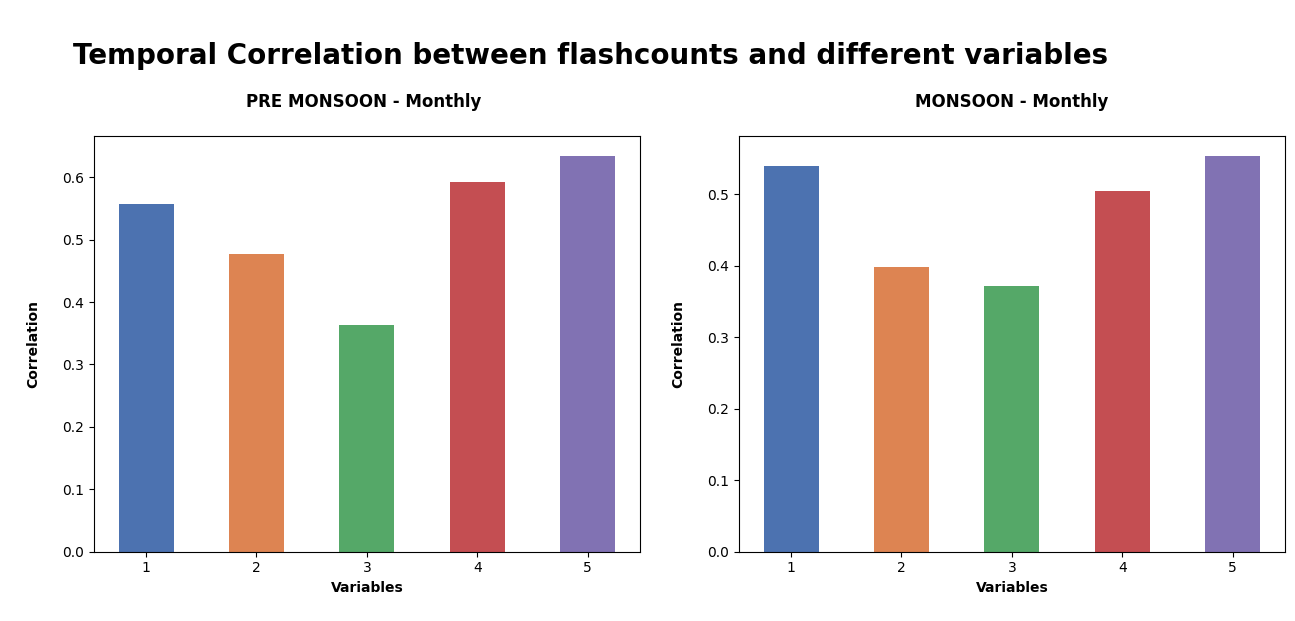

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data variables and settings
shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

variables_to_compare = shortforms  # Example variable list (replace with your data variable list)
palette = sns.color_palette('deep')

# Plot for PRE MONSOON - Monthly
axs[0].bar(PRE_MONSOON_monthly_correlation_values.keys(), PRE_MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
axs[0].set_xticks(np.arange(len(variables_to_compare)))
axs[0].set_xticklabels(shortforms)
axs[0].set_title('\nPRE MONSOON - Monthly \n', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Variables\n', fontsize=10, fontweight='bold')
axs[0].set_ylabel('\nCorrelation\n', fontsize=10, fontweight='bold')

# Plot for MONSOON - Monthly
axs[1].bar(MONSOON_monthly_correlation_values.keys(), MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
axs[1].set_xticks(np.arange(len(variables_to_compare)))
axs[1].set_xticklabels(shortforms)
axs[1].set_title('\nMONSOON - Monthly\n', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Variables\n', fontsize=10, fontweight='bold')
axs[1].set_ylabel('\nCorrelation\n', fontsize=10, fontweight='bold')

# Add borders around each subplot
for ax in axs.flat:
    ax.set_frame_on(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# # Add legend on the right
# handles = [plt.Line2D([0], [0], color=palette[i], lw=4, label=f'{short}: {full}') for i, (short, full) in enumerate(zip(shortforms, full_names))]
# fig.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Abbreviations')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0.1, 0.1, 0.97, 1])

plt.subplots_adjust(top=0.80)  # Adjust top to make room for the suptitle
plt.suptitle('\nTemporal Correlation between flashcounts and different variables \n', fontsize=20, fontweight='bold')

# Show plot
plt.show()


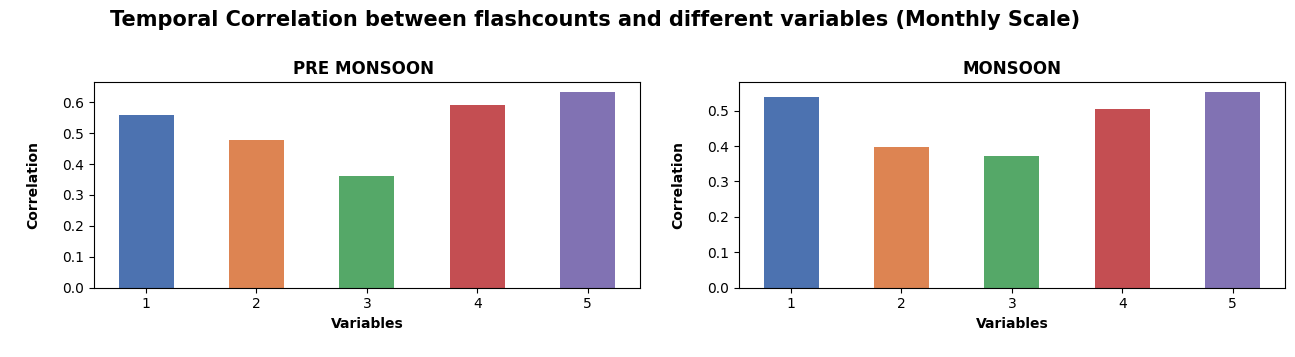

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data variables and settings
shortforms = ['1', '2', '3', '4', '5']
full_names = ['CAPE', 'KI', 'TTI', 'CAPE x PPT_INDEX', 'CAPE x Sp. Hum (850 hPa) INDEX']

# Create subplots with 1 row and 2 columns, reduced height (figsize)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))  # Reduced height from 7 to 5

variables_to_compare = shortforms  # Example variable list (replace with your data variable list)
palette = sns.color_palette('deep')

# Plot for PRE MONSOON - Monthly
axs[0].bar(PRE_MONSOON_monthly_correlation_values.keys(), PRE_MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
axs[0].set_xticks(np.arange(len(variables_to_compare)))
axs[0].set_xticklabels(shortforms)
axs[0].set_title('PRE MONSOON ', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Variables\n', fontsize=10, fontweight='bold')
axs[0].set_ylabel('\nCorrelation\n', fontsize=10, fontweight='bold')

# Plot for MONSOON - Monthly
axs[1].bar(MONSOON_monthly_correlation_values.keys(), MONSOON_monthly_correlation_values.values(), color=palette, width=0.5)
axs[1].set_xticks(np.arange(len(variables_to_compare)))
axs[1].set_xticklabels(shortforms)
axs[1].set_title('MONSOON', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Variables\n', fontsize=10, fontweight='bold')
axs[1].set_ylabel('\nCorrelation\n', fontsize=10, fontweight='bold')

# Add borders around each subplot
for ax in axs.flat:
    ax.set_frame_on(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0.1, 0.1, 0.97, 1])

plt.subplots_adjust(top=0.80)  # Adjust top to make room for the suptitle
plt.suptitle('Temporal Correlation between flashcounts and different variables (Monthly Scale)', fontsize=15, fontweight='bold')

# Show plot
plt.show()
